In [1]:
import numpy as np
import scipy.fft as fft
import matplotlib.pyplot as plt
import os 
import pandas as pd
from scipy import stats
from astropy.io import fits
from scipy.optimize import curve_fit
from astropy.io import ascii
from astropy.table import Table
import csv
import math
import stingray
import lightcurve
from stingray import Lightcurve
from stingray import Powerspectrum
from stingray import AveragedPowerspectrum
from stingray import Crossspectrum
from stingray.exceptions import StingrayError
from stingray import AveragedCrossspectrum
#import pyfits
#import pyfits
#import modules and packages
import numpy as np
import scipy.fft as fft
import matplotlib.pyplot as plt
import os 
from scipy import stats
from astropy.io import fits
from scipy.optimize import curve_fit
from more_itertools import locate
from itertools import count
#from more_itertools import seekable
from astropy.io import ascii
from astropy.table import Table
import math 


In [12]:
a=12
b=(1/256)*2**(a)

b

16.0

In [14]:
1.34482+0.109148

1.453968

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import math 

In [ ]:
q_0=1.45*10**(-2)  #q_0 ad u_0 are the measured mean stokes parameters (used to compare with stokes calculated from (p,phi) grid values to calculate significance)
u_0=-5.8*10**(-2)
error=2.5*10**(-2)
#p_mean = np.sqrt(q_0**2 + u_0**2)



def contour(q_0=None,u_0=None,error=None,chi_sqrd_file=None,pcube_file=None):
   # p_mean = np.sqrt(q_0**2 + u_0**2)
   # phi_min=np.radians(-180) 
   # phi_min_ambiguity=np.radians(0)
    
        
        
  #  if ambiguity == 'off':
  #      phi_min=phi_min_ambiguity
  #  if ambiguity == 'on':
  #          pass
    
  #  phi_max=np.radians(180)
  #  p_min=0.0 #starting polarisation degree
  #p_max = (p_mean + (3 * error))*1
    
    if q_0 is not None and u_0 is not None and error is not None and chi_sqrd_file is None:
        p_mean = np.sqrt(q_0**2 + u_0**2)
        phi_min=np.radians(-180) 
        phi_min_ambiguity=np.radians(0)
        phi_max=np.radians(180)
        p_min=0.0 #starting polarisation degree
        p_max = (p_mean + (3 * error))*1
       # if ambiguity == 'off':
       #     phi_min=phi_min_ambiguity
       # else:
       #         pass
       
        p_grid=np.linspace(p_min,p_max,200)
        print(len(p_grid))
        phi_grid=np.linspace(phi_min,phi_max,200)
        print(len(phi_grid))

        #Grid Maker for r
        counter=0
        r=[]
        r_all=[]

        #print(p_grid)
        while counter<=len(phi_grid):
            for i in p_grid:
                q=i*np.cos(2*phi_grid[counter])  #calculaing q and u for ith phi in grid over all i in p 
                u=i*np.sin(2*phi_grid[counter])
                rval=np.sqrt((q_0-q)**2+(u_0-u)**2) #calculating 'distance' between q,u coords
                r.append(rval)  #attaching value to array and repeating through all pi



            counter=counter+1   #when we have apended the final value for p_final,phi_i we append complete array to mega array, move onto next phi via the counter
            r_all.append(r)     # and reset the first array back to empty to fill up again with next round of phi_i calculated vals
            r=[]
                #print(counter)




        #print(n)       
        #print(r_all)

        r_all=np.array(r_all)
        n_all=r_all/error #Calculating n from grid of r
        print(len(n_all))
        n_all= np.array(n_all)
        n_all_t = np.transpose(n_all)  #grid requires transposing 
        best_cs=0 #sigma values
        level_1=1
        level_2=2
        level_3=3
        
        phi_min=np.radians(-180)

        #-- Plot... ------------------------------------------------ #z order just defines if something is plot on top of another thing 
        fig, ax = plt.subplots(subplot_kw=dict(projection='polar', theta_offset=np.radians(90)), figsize=(8,8))
        ax.contourf(n_all_t, levels=[best_cs, level_1, level_2, level_3], cmap='inferno', extent=(phi_min, phi_max, p_min*100, p_max*100),alpha=0.5, zorder=5) #colours in the contours, f
        ax.contour(n_all_t, levels=[level_1, level_2, level_3], colors=['indigo', 'mediumorchid', 'orange'], extent=(phi_min, phi_max, p_min*100,p_max*100), zorder=10) #outlines contours
        ax.set_thetamin(0) #setting the minimum polarisation angle (named theta from polar coords)
        ax.set_thetamax(360) #setting the maximum polarisation angle 
        ax.tick_params(axis="y", labelsize=15, width=5.5, which='major') #gives number value nice layout
        ax.tick_params(axis="x", labelsize=15, width=5.5, which='major',pad=13)
        ax.set_rmin(0) #min polarisation degree
        ax.set_rmax(15) #max polarisation degree
        ax.set_yticks(np.linspace(0,15,7)) # Changes how many rings you get
        #ax.yaxis.set_major_formatter("[%.2f") #moves the r labels left and right??
        ax.set_xticks(np.radians(np.linspace(0,360, 10, endpoint=False)))
        ax.annotate('p(%)', fontsize=15, xy=(0.25,1), xycoords='axes fraction')
        ax.annotate('$\psi$ (deg)', fontsize=15, xy=(0.55,1.02), xycoords='axes fraction')
        #ax.set_yticklabels(["-50", "-60", "-70", "-80"], horizontalalignment = "left", verticalalignment = "top")
        ax.set_rlabel_position(25) 
        ax.grid(linewidth=1, linestyle='--') #produces gridlines on plot

        print(len(p_grid))
        print(len(phi_grid))
        print(len(n_all))
        plt.show()
        
    elif q_0 is None and u_0 is None and error is None and chi_sqrd_file is not None :
        #p_mean = np.sqrt(q_0**2 + u_0**2)
        #phi_min=np.radians(-180) 
        #phi_min_ambiguity=np.radians(0)
        data = np.loadtxt(chi_sqrd_file)
        data1 = np.transpose(data)
        
        p_min=0  #defining min and max polarisation  degree and angle: converting p to percentage
        phi_min=np.radians(0)  #phi already in radians
        p_max=9
        phi_max=np.radians(180)
        
        #p_min=2  #defining min and max polarisation  degree and angle: converting p to percentage
        #phi_min=np.radians(-35)  #phi already in radians
        #p_max=8
        #phi_max=np.radians(15)
        #phi_min=np.radians(-180)
        
        best_cs=data.min()
        level_1=best_cs+2.3
        level_2=best_cs+6.18 #4.61
        level_3=best_cs+11.83#9.21

        #-- Plot... ------------------------------------------------
        fig, ax = plt.subplots(subplot_kw=dict(projection='polar',theta_offset=np.radians(0)), figsize=(8,8))
        ax.contourf(data, levels=[best_cs,level_1, level_2, level_3], cmap='inferno', extent=(phi_min, phi_max, p_min, p_max),alpha=0.2, zorder=5) #colours in the contours, f
        ax.contour(data, levels=[level_1, level_2, level_3], colors=['indigo', 'mediumorchid', 'orange'], extent=(phi_min, phi_max, p_min,p_max), zorder=10) #outlines contours
        ax.set_thetamin(0) #setting the minimum polarisation angle (named theta from polar coords)
        ax.set_thetamax(180) #setting the maximum polarisation angle 
        ax.tick_params(axis="both", labelsize=15, size=7.0, width=1.5,   which='major') #gives number value nice layout
        ax.set_rmin(0) #min polarisation degree
        ax.set_rmax(10) #max polarisation degree
        ax.set_yticks(np.linspace(0,10,5)) # Changes how many rings you get
        #ax.yaxis.set_major_formatter("[%.2f") #moves the r labels left and right??
        ax.set_xticks(np.radians(np.linspace(0,180, 10, endpoint=False)))
        ax.annotate('p(%)', fontsize=15, xy=(0.41,0.755), xycoords='axes fraction')
        ax.annotate('$\psi$ (deg)', fontsize=15, xy=(0.10,1.0), xycoords='axes fraction')
        #ax.annotate('p(%)', fontsize=15, xy=(0.8,0.35), xycoords='axes fraction')
        #ax.annotate('$\psi$ (deg)', fontsize=15, xy=(0.5,0.95), xycoords='axes fraction')
        ax.set_rlabel_position(0)
        ax.grid(linewidth=1, linestyle='--') #produces gridlines on plot


        plt.show()
    
    elif q_0 is not None and u_0 is not None and error is not None and chi_sqrd_file is not None:
        p_mean = np.sqrt(q_0**2 + u_0**2)
        phi_min=np.radians(-180) 
        phi_min_ambiguity=np.radians(0)
        
        p_grid=np.linspace(p_min,p_max,200)
        phi_grid=np.linspace(phi_min,phi_max,200)
        
      #  if ambiguity == 'off':
      #      phi_min=phi_min_ambiguity
      #  else:
      #      pass
        

        #Grid Maker
        counter=0
        r=[]
        r_all=[]
        while counter<len(phi_grid):
            for i in p_grid:
                q=i*np.cos(2*phi_grid[counter])  #calculaing q and u for ith phi in grid over all i in p 
                u=i*np.sin(2*phi_grid[counter])
                rval=np.sqrt((q_0-q)**2+(u_0-u)**2) #calculating 'distance' between q,u coords
                r.append(rval)  #attaching value to array and repeating through all pi



            counter=counter+1   #when we have apended the final value for p_final,phi_i we append complete array to mega array, move onto next phi via the counter
            r_all.append(r)     # and reset the first array back to empty to fill up again with next round of phi_i calculated vals
            r=[]


        r_all=np.array(r_all)
        n_all=r_all/error #Calculating n from grid of r

        n_all= np.array(n_all)
        n_all_t = np.transpose(n_all)  #grid requires transposing 
        best_cs=0 #sigma values
        level_1=1
        level_2=2
        level_3=3


        data = np.loadtxt(chi_sqrd_file)
        data1 = np.transpose(data)
        best_cs_chi=data.min()
        level_1_chi=best_cs_chi+2.3
        level_2_chi=best_cs_chi+6.18 #4.61
        level_3_chi=best_cs_chi+11.83#9.21
        
        p_min_chi=2  #defining min and max polarisation  degree and angle: converting p to percentage
        phi_min_chi=np.radians(-35)  #phi already in radians
        p_max_chi=8
        phi_max_chi=np.radians(15)
        phi_min=np.radians(-180)

        #-- Plot... ------------------------------------------------
        fig, ax = plt.subplots(subplot_kw=dict(projection='polar',theta_offset=np.radians(90)), figsize=(8,8))
        ax.contourf(data1, levels=[level_1_chi, level_2_chi, level_3_chi], cmap='inferno', extent=(phi_min_chi, phi_max_chi, p_min_chi,p_max_chi), alpha=0.7, zorder=5) #colours in the contours, f
        ax.contour(data1, levels=[level_1_chi, level_2_chi, level_3_chi], colors=['indigo', 'mediumorchid', 'orange'], extent=(phi_min_chi, phi_max_chi, p_min_chi,p_max_chi), zorder=5) #outlines contours
        
        ax.contourf(n_all_t, levels=[level_1, level_2, level_3], cmap='inferno', extent=(phi_min, phi_max, p_min*100, p_max*100),alpha=0.5, zorder=5) #colours in the contours, f
        ax.contour(n_all_t, levels=[level_1, level_2, level_3], colors=['indigo', 'mediumorchid', 'orange'], extent=(phi_min, phi_max, p_min*100,p_max*100), zorder=10) #outlines contours                       
        #ax.set_thetamin(0) #setting the minimum polarisation angle (named theta from polar coords)
        #ax.set_thetamax(360) #setting the maximum polarisation angle 
        ax.tick_params(axis="both", labelsize=15, size=7.0, width=1.5,   which='major') #gives number value nice layout
        ax.set_rmin(0) #min polarisation degree
        ax.set_rmax(15) #max polarisation degree
        ax.set_yticks(np.linspace(0,15,7)) # Changes how many rings you get
        #ax.yaxis.set_major_formatter("[%.2f") #moves the r labels left and right??
        ax.set_xticks(np.radians(np.linspace(0,180, 10, endpoint=False)))
        ax.annotate('p(%)', fontsize=15, xy=(0.25,1), xycoords='axes fraction')
        ax.annotate('$\psi$ (deg)', fontsize=15, xy=(0.55,1.02), xycoords='axes fraction')
        ax.set_rlabel_position(30)
        ax.grid(linewidth=1, linestyle='--') #produces gridlines on plot


        


        plt.show()
        
        
        
        
    elif q_0 is None and u_0 is None and chi_sqrd_file is None and error is None and pcube_file is not None:
        with fits.open(pcube_file) as hdu:
            data=hdu[1].data
            #hdu.info()
            q_0=float(data.field('QN'))
            u_0=float(data.field('UN'))
            Q_err=float(data.field('QN_ERR'))
            U_err=float(data.field('UN_ERR'))
            error=(Q_err+U_err)/2
           # print(q_0)
           # print(u_0)
           # print(error)

            p_mean = np.sqrt(q_0**2 + u_0**2)
            phi_min=np.radians(-180) 
            phi_min_ambiguity=np.radians(0)

            phi_max=np.radians(180)
            p_min=0.0 #starting polarisation degree
            p_max = (p_mean + (3 * error))*1




            p_grid=np.linspace(p_min,p_max,200)
            phi_grid=np.linspace(phi_min,phi_max,200)

            #Grid Maker for r
            counter=0
            r=[]
            r_all=[]

            #print(p_grid)
            while counter<len(phi_grid):
                for i in p_grid:
                    q=i*np.cos(2*phi_grid[counter])  #calculaing q and u for ith phi in grid over all i in p 
                    u=i*np.sin(2*phi_grid[counter])
                    rval=np.sqrt((q_0-q)**2+(u_0-u)**2) #calculating 'distance' between q,u coords
                    r.append(rval)  #attaching value to array and repeating through all pi
                    #print(r)



                counter=counter+1   #when we have apended the final value for p_final,phi_i we append complete array to mega array, move onto next phi via the counter
                r_all.append(r)     # and reset the first array back to empty to fill up again with next round of phi_i calculated vals
                r=[]
                    #print(counter)




            #print(n)       
            #print(r_all)

            r_all=np.array(r_all)
            n_all=r_all/error #Calculating n from grid of r

            n_all= np.array(n_all)
            n_all_t = np.transpose(n_all)  #grid requires transposing 
           # print(n_all)
            best_cs=0 #sigma values
            level_1=1.0
            level_2=2.0
            level_3=3.0

            #-- Plot... ------------------------------------------------ #z order just defines if something is plot on top of another thing 
            fig, ax = plt.subplots(subplot_kw=dict(projection='polar', theta_offset=np.radians(90)), figsize=(8,8))
            ax.contourf(n_all_t, levels=[best_cs,level_1, level_2, level_3], cmap='inferno', extent=(phi_min, phi_max, p_min*100, p_max*100),alpha=0.2, zorder=5) #colours in the contours, f
            ax.contour(n_all_t, levels=[level_1, level_2,level_3], colors=['indigo', 'mediumorchid', 'orange'], extent=(phi_min, phi_max, p_min*100,p_max*100), zorder=5) #outlines contours
            ax.set_thetamin(0) #setting the minimum polarisation angle (named theta from polar coords)
            ax.set_thetamax(360) #setting the maximum polarisation angle 
            ax.tick_params(axis="y", labelsize=15, width=5.5, which='major') #gives number value nice layout
            ax.tick_params(axis="x", labelsize=15, width=5.5, which='major',pad=13)
            ax.set_rmin(0) #min polarisation degree
            ax.set_rmax(10) #max polarisation degree
            ax.set_yticks(np.linspace(0,10,6)) # Changes how many rings you get
            #ax.yaxis.set_major_formatter("[%.2f") #moves the r labels left and right??
            ax.set_xticks(np.radians(np.linspace(0,360, 16, endpoint=False)))
            ax.annotate('p(%)', fontsize=15, xy=(0.41,0.755), xycoords='axes fraction')
            ax.annotate('$\psi$ (deg)', fontsize=15, xy=(0.10,1.0), xycoords='axes fraction')
            #ax.set_yticklabels(["-50", "-60", "-70", "-80"], horizontalalignment = "left", verticalalignment = "top")
            ax.set_rlabel_position(0) 
            ax.grid(linewidth=1, linestyle='--') #produces gridlines on plot
            plt.savefig('pcub.png')
            print(len(n_all))
            #print(p_grid)
            #print(phi_grid)
            plt.show()
            

In [ ]:
#MY CODE
#ADAMS DATA

contour(pcube_file='/home/c2032014/PhD/ixpe01003601_pcube.fits')
#plt.savefig('c_plot_mix.png')

In [ ]:


#ADAMS CODE
#ADAMS DATA


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import astropy
from astropy.io import fits
import scipy
from scipy.special import erfinv, erf


# Set pcube filename
pcube_filename = '/home/c2032014/PhD/ixpe01003601_pcube.fits'

# Read in Stokes parameters from the pcube
pcube_file = fits.open(pcube_filename)
pcube      = pcube_file['POLARIZATION'].data
q0         = pcube.field('QN')
dq         = pcube.field('QN_ERR')
u0         = pcube.field('UN')
du         = pcube.field('UN_ERR')
sig        = 0.5 * ( dq + du )

# Set grid to plot
p0     = 100.0 * ( q0**2 + u0**2 )**0.5
pmax   = p0 + 4.5*(100.0*sig)
pmin   =  0.0
psimin = -180.0
psimax =  180.0
imax = 1000
jmax = 1000

# Set up data matrix
data = np.zeros( (imax,jmax) )
for i in range(0, imax): # i from 0 to imax-1
    p = pmin + i * ( pmax - pmin ) / (imax-1)
    for j in range(0, jmax): # j from 0 to jmax-1
        psi = psimin + j * ( psimax - psimin ) / (jmax-1)
        q   = 0.01 * p * np.cos( 2.0 * psi * np.pi / 180.0 )
        u   = 0.01 * p * np.sin( 2.0 * psi * np.pi / 180.0 )        
        nsig = ( (q-q0)**2 + (u-u0)**2 )**0.5 / sig
        data[i][j] = nsig


# Plot

data1 = data


print(len(data))

# data = np.loadtxt('nplot.qdp')
# data1 = np.transpose(data)


# CONFID  = 0.68
# level_1 = np.sqrt( -2.0 * np.log(1.0-CONFID) )
# CONFID  = 0.9
# level_2 = np.sqrt( -2.0 * np.log(1.0-CONFID) )
# print('level_2=',level_2)
# CONFID  = 0.99
# level_3 = np.sqrt( -2.0 * np.log(1.0-CONFID) )

# print("level_1 = ",level_1)
# print("level_2 = ",level_2)
# print("level_3 = ",level_3)

print('p0=',p)
print('psi0=',psi)
print('sig=',sig)

best_cs=0.0  #data.min()
level_1=1.0  #best_cs+2.3
level_2=2.0  #best_cs+6.18 #4.61
level_3=3.0  #best_cs+11.83#9.21

#-- Plot... ------------------------------------------------
fig, ax = plt.subplots(subplot_kw=dict(projection='polar',theta_offset=np.radians(90)), figsize=(8,8))
ax.contourf(data1, levels=[best_cs, level_1, level_2, level_3], cmap='inferno', extent=(np.radians(psimin), np.radians(psimax), pmin,pmax), alpha=0.2, zorder=5)
ax.contour(data1, levels=[level_1, level_2, level_3], colors=['indigo', 'mediumorchid', 'orange'], extent=(np.radians(psimin), np.radians(psimax), pmin,pmax), zorder=5)
ax.set_thetamin(-180)
ax.set_thetamax(180)
ax.tick_params(axis="both", grid_color='grey', labelsize=15, size=7.0, width=1.5,   which='both') 
ax.set_rmin(0)
ax.set_rmax(pmax)
ax.annotate('p(%)', fontsize=15, xy=(0.28,0.8), xycoords='axes fraction')
ax.annotate('$\psi$ (deg)', fontsize=15, xy=(0.15,0.95), xycoords='axes fraction')

ax.grid(linewidth=1, linestyle='--')
ax.set_xticks(np.radians(np.linspace(-180.0,180.0,16,endpoint=False)))


plt.show()

In [ ]:

#ADAMS CODE
#MY DATA




import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import astropy
from astropy.io import fits
import scipy
from scipy.special import erfinv, erf


# Set pcube filename
pcube_filename = '/home/c2032014/PhD/IC4329A/01003601/event_l2/ixpe01003601_pcube_bkgsub.fits'

# Read in Stokes parameters from the pcube
pcube_file = fits.open(pcube_filename)
pcube      = pcube_file['POLARIZATION'].data
q0         = pcube.field('QN')
dq         = pcube.field('QN_ERR')
u0         = pcube.field('UN')
du         = pcube.field('UN_ERR')
sig        = 0.5 * ( dq + du )

# Set grid to plot
p0     = 100.0 * ( q0**2 + u0**2 )**0.5
pmax   = p0 + 4.5*(100.0*sig)
pmin   =  0.0
psimin = -180.0
psimax =  180.0
imax = 1000
jmax = 1000

# Set up data matrix
data = np.zeros( (imax,jmax) )
for i in range(0, imax): # i from 0 to imax-1
    p = pmin + i * ( pmax - pmin ) / (imax-1)
    for j in range(0, jmax): # j from 0 to jmax-1
        psi = psimin + j * ( psimax - psimin ) / (jmax-1)
        q   = 0.01 * p * np.cos( 2.0 * psi * np.pi / 180.0 )
        u   = 0.01 * p * np.sin( 2.0 * psi * np.pi / 180.0 )        
        nsig = ( (q-q0)**2 + (u-u0)**2 )**0.5 / sig
        data[i][j] = nsig


# Plot

data1 = data


print(len(data))

# data = np.loadtxt('nplot.qdp')
# data1 = np.transpose(data)


# CONFID  = 0.68
# level_1 = np.sqrt( -2.0 * np.log(1.0-CONFID) )
# CONFID  = 0.9
# level_2 = np.sqrt( -2.0 * np.log(1.0-CONFID) )
# print('level_2=',level_2)
# CONFID  = 0.99
# level_3 = np.sqrt( -2.0 * np.log(1.0-CONFID) )

# print("level_1 = ",level_1)
# print("level_2 = ",level_2)
# print("level_3 = ",level_3)

print('p0=',p)
print('psi0=',psi)
print('sig=',sig)

best_cs=0.0  #data.min()
level_1=1.0  #best_cs+2.3
level_2=2.0  #best_cs+6.18 #4.61
level_3=3.0  #best_cs+11.83#9.21

#-- Plot... ------------------------------------------------
fig, ax = plt.subplots(subplot_kw=dict(projection='polar',theta_offset=np.radians(90)), figsize=(8,8))
ax.contourf(data1, levels=[best_cs, level_1, level_2, level_3], cmap='inferno', extent=(np.radians(psimin), np.radians(psimax), pmin,pmax), alpha=0.2, zorder=5)
ax.contour(data1, levels=[level_1, level_2, level_3], colors=['indigo', 'mediumorchid', 'orange'], extent=(np.radians(psimin), np.radians(psimax), pmin,pmax), zorder=5)
ax.set_thetamin(-180)
ax.set_thetamax(180)
ax.tick_params(axis="both", grid_color='grey', labelsize=15, size=7.0, width=1.5,   which='both') 
ax.set_rmin(0)
ax.set_rmax(pmax)
ax.annotate('p(%)', fontsize=15, xy=(0.28,0.8), xycoords='axes fraction')
ax.annotate('$\psi$ (deg)', fontsize=15, xy=(0.15,0.95), xycoords='axes fraction')

ax.grid(linewidth=1, linestyle='--')
ax.set_xticks(np.radians(np.linspace(-180.0,180.0,16,endpoint=False)))


plt.show()

In [ ]:
#MY CODE 
#MY DATA

contour(pcube_file='/home/c2032014/PhD/IC4329A/01003601/event_l2/ixpe01003601_pcube_bkgsub.fits')

In [ ]:
contour(pcube_file='/home/c2032014/Downloads/ixpe01003601_pcube_bkgsub(1).fits') '#adams subbed



In [ ]:
contour(chi_sqrd_file='/home/c2032014/PhD/IC4329A/specpol1_pvspsi_steppar_1.qdp')

#change to -90  on right 90 on left


In [ ]:
contour(chi_sqrd_file='/home/c2032014/PhD/IC4329A/cplot.qdp')

In [ ]:
contour(chi_sqrd_file='/home/c2032014/PhD/IC4329A/cplot.qdp')

In [ ]:
contour(chi_sqrd_file='/home/c2032014/Downloads/p_vs_psi_relxillCp_50by50(1).qdp')
#steppar 8 0.0 0.14 39 9 0.0 180.0 39


In [14]:
data = np.loadtxt('/home/c2032014/Downloads/p_vs_psi_relxillCp_50by50(1).qdp')
data1 = np.transpose(data)

p_min=0  #defining min and max polarisation  degree and angle: converting p to percentage
phi_min=np.radians(0)  #phi already in radians
p_max=9
phi_max=np.radians(180)

#p_min=2  #defining min and max polarisation  degree and angle: converting p to percentage
#phi_min=np.radians(-35)  #phi already in radians
#p_max=8
#phi_max=np.radians(15)
#phi_min=np.radians(-180)

best_cs=data.min()
level_1=best_cs+2.3
level_2=best_cs+6.18 #4.61
level_3=best_cs+11.83#9.21

#-- Plot... ------------------------------------------------
fig, ax = plt.subplots(subplot_kw=dict(projection='polar',theta_offset=np.radians(90)), figsize=(8,8))
ax.contourf(data, levels=[best_cs,level_1, level_2, level_3], cmap='inferno', extent=(phi_min, phi_max, p_min, p_max),alpha=0.2, zorder=5) #colours in the contours, f
ax.contour(data, levels=[level_1, level_2, level_3], colors=['indigo', 'mediumorchid', 'orange'], extent=(phi_min, phi_max, p_min,p_max), zorder=10) #outlines contours
ax.set_thetamin(0) #setting the minimum polarisation angle (named theta from polar coords)
ax.set_thetamax(180) #setting the maximum polarisation angle 
ax.tick_params(axis="both", labelsize=15, size=7.0, width=1.5,   which='major') #gives number value nice layout
ax.set_rmin(0) #min polarisation degree
ax.set_rmax(10) #max polarisation degree
ax.set_yticks(np.linspace(0,10,5)) # Changes how many rings you get
#ax.yaxis.set_major_formatter("[%.2f") #moves the r labels left and right??
ax.set_xticks(np.radians(np.linspace(0,180, 10)))
ax.annotate('p(%)', fontsize=15, xy=(0.85,0.495), xycoords='axes fraction')
ax.annotate('$\psi$ (deg)', fontsize=15, xy=(0.15,0.9), xycoords='axes fraction')
#ax.annotate('p(%)', fontsize=15, xy=(0.8,0.35), xycoords='axes fraction')
#ax.annotate('$\psi$ (deg)', fontsize=15, xy=(0.5,0.95), xycoords='axes fraction')
ax.set_rlabel_position(50)
ax.grid(linewidth=1, linestyle='--') #produces gridlines on plot

plt.savefig('adam_5050.png')
plt.show()

FileNotFoundError: /home/c2032014/Downloads/p_vs_psi_relxillCp_50by50(1).qdp not found.

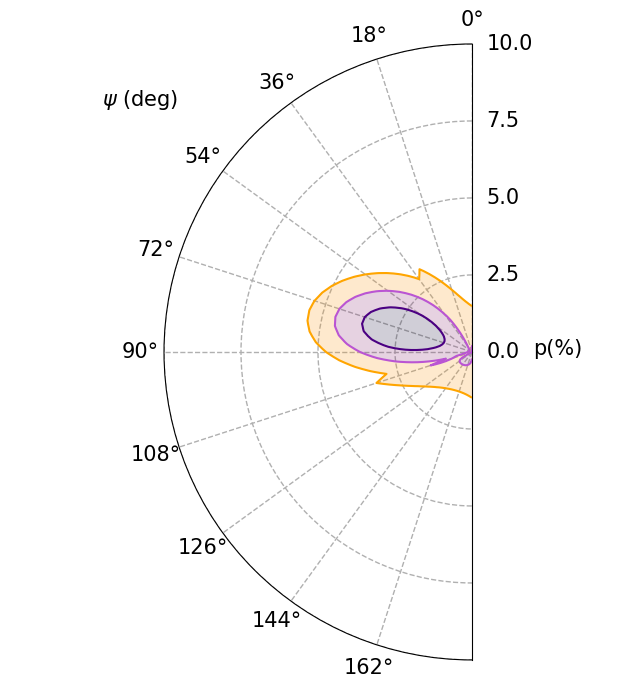

In [15]:

#Plot made with xspec steppar 




data = np.loadtxt('/home/c2032014/PhD/IC4329A/final_spike.qdp')
data1 = np.transpose(data)

p_min=0  #defining min and max polarisation  degree and angle: converting p to percentage
phi_min=np.radians(0)  #phi already in radians
p_max=9
phi_max=np.radians(180)

#p_min=2  #defining min and max polarisation  degree and angle: converting p to percentage
#phi_min=np.radians(-35)  #phi already in radians
#p_max=8
#phi_max=np.radians(15)
#phi_min=np.radians(-180)

best_cs=data.min()
level_1=best_cs+2.3
level_2=best_cs+6.18 #4.61
level_3=best_cs+11.83#9.21

#-- Plot... ------------------------------------------------
fig, ax = plt.subplots(subplot_kw=dict(projection='polar',theta_offset=np.radians(90)), figsize=(8,8))
ax.contourf(data, levels=[best_cs,level_1, level_2, level_3], cmap='inferno', extent=(phi_min, phi_max, p_min, p_max),alpha=0.2, zorder=5) #colours in the contours, f
ax.contour(data, levels=[level_1, level_2, level_3], colors=['indigo', 'mediumorchid', 'orange'], extent=(phi_min, phi_max, p_min,p_max), zorder=10) #outlines contours
ax.set_thetamin(0) #setting the minimum polarisation angle (named theta from polar coords)
ax.set_thetamax(180) #setting the maximum polarisation angle 
ax.tick_params(axis="both", labelsize=15, size=7.0, width=1.5,   which='major') #gives number value nice layout
ax.set_rmin(0) #min polarisation degree
ax.set_rmax(10) #max polarisation degree
ax.set_yticks(np.linspace(0,10,5)) # Changes how many rings you get
#ax.yaxis.set_major_formatter("[%.2f") #moves the r labels left and right??
ax.set_xticks(np.radians(np.linspace(0,180, 10, endpoint=False)))
ax.annotate('p(%)', fontsize=15, xy=(0.85,0.495), xycoords='axes fraction')
ax.annotate('$\psi$ (deg)', fontsize=15, xy=(0.15,0.9), xycoords='axes fraction')
#ax.annotate('p(%)', fontsize=15, xy=(0.8,0.35), xycoords='axes fraction')
#ax.annotate('$\psi$ (deg)', fontsize=15, xy=(0.5,0.95), xycoords='axes fraction')
ax.set_rlabel_position(0)
ax.grid(linewidth=1, linestyle='--') #produces gridlines on plot

plt.savefig('adam_5050.png')
plt.show()

In [ ]:
      p_mean = np.sqrt(q_0**2 + u_0**2)
        phi_min=np.radians(-180) 
        phi_min_ambiguity=np.radians(0)
        phi_max=np.radians(180)
        p_min=0.0 #starting polarisation degree
        p_max = (p_mean + (3 * error))*1
       # if ambiguity == 'off':
       #     phi_min=phi_min_ambiguity
       # else:
       #         pass
       
        p_grid=np.linspace(p_min,p_max,200)
        phi_grid=np.linspace(phi_min,phi_max,200)

        #Grid Maker for r
        counter=0
        r=[]
        r_all=[]

        #print(p_grid)
        while counter<len(phi_grid):
            for i in p_grid:
                q=i*np.cos(2*phi_grid[counter])  #calculaing q and u for ith phi in grid over all i in p 
                u=i*np.sin(2*phi_grid[counter])
                rval=np.sqrt((q_0-q)**2+(u_0-u)**2) #calculating 'distance' between q,u coords
                r.append(rval)  #attaching value to array and repeating through all pi



            counter=counter+1   #when we have apended the final value for p_final,phi_i we append complete array to mega array, move onto next phi via the counter
            r_all.append(r)     # and reset the first array back to empty to fill up again with next round of phi_i calculated vals
            r=[]
                #print(counter)




        #print(n)       
        #print(r_all)

        r_all=np.array(r_all)
        n_all=r_all/error #Calculating n from grid of r

        n_all= np.array(n_all)
        n_all_t = np.transpose(n_all)  #grid requires transposing 
        best_cs=0 #sigma values
        level_1=1
        level_2=2
        level_3=3
        
        phi_min=np.radians(-180)

        #-- Plot... ------------------------------------------------ #z order just defines if something is plot on top of another thing 
        fig, ax = plt.subplots(subplot_kw=dict(projection='polar', theta_offset=np.radians(90)), figsize=(8,8))
        ax.contourf(n_all_t, levels=[best_cs, level_1, level_2, level_3], cmap='inferno', extent=(phi_min, phi_max, p_min*100, p_max*100),alpha=0.5, zorder=5) #colours in the contours, f
        ax.contour(n_all_t, levels=[level_1, level_2, level_3], colors=['indigo', 'mediumorchid', 'orange'], extent=(phi_min, phi_max, p_min*100,p_max*100), zorder=10) #outlines contours
        ax.set_thetamin(0) #setting the minimum polarisation angle (named theta from polar coords)
        ax.set_thetamax(360) #setting the maximum polarisation angle 
        ax.tick_params(axis="y", labelsize=15, width=5.5, which='major') #gives number value nice layout
        ax.tick_params(axis="x", labelsize=15, width=5.5, which='major',pad=13)
        ax.set_rmin(0) #min polarisation degree
        ax.set_rmax(15) #max polarisation degree
        ax.set_yticks(np.linspace(0,15,7)) # Changes how many rings you get
        #ax.yaxis.set_major_formatter("[%.2f") #moves the r labels left and right??
        ax.set_xticks(np.radians(np.linspace(0,360, 10, endpoint=False)))
        ax.annotate('p(%)', fontsize=15, xy=(0.25,1), xycoords='axes fraction')
        ax.annotate('$\psi$ (deg)', fontsize=15, xy=(0.55,1.02), xycoords='axes fraction')
        #ax.set_yticklabels(["-50", "-60", "-70", "-80"], horizontalalignment = "left", verticalalignment = "top")
        ax.set_rlabel_position(25) 
        ax.grid(linewidth=1, linestyle='--') #produces gridlines on plot

Writing an imitating "steppar" routine to replace the XSPEC function.

I want to be able to step through my 2D parameter space and calculate the chi squared statistic at each point in the space. I

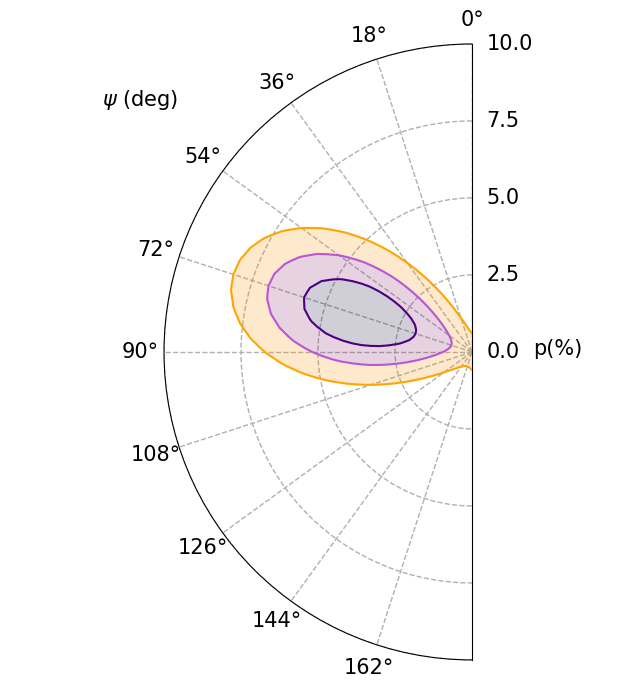

In [10]:
#PEX fixed to zero



data = np.loadtxt('/home/c2032014/PhD/IC4329A/1st_pex_0.qdp')
data1 = np.transpose(data)

p_min=0  #defining min and max polarisation  degree and angle: converting p to percentage
phi_min=np.radians(0)  #phi already in radians
p_max=15
phi_max=np.radians(180)

#p_min=2  #defining min and max polarisation  degree and angle: converting p to percentage
#phi_min=np.radians(-35)  #phi already in radians
#p_max=8
#phi_max=np.radians(15)
#phi_min=np.radians(-180)

best_cs=data.min()
level_1=best_cs+2.3
level_2=best_cs+6.18 #4.61
level_3=best_cs+11.83#9.21

#-- Plot... ------------------------------------------------
fig, ax = plt.subplots(subplot_kw=dict(projection='polar',theta_offset=np.radians(90)), figsize=(8,8))
ax.contourf(data, levels=[best_cs,level_1, level_2, level_3], cmap='inferno', extent=(phi_min, phi_max, p_min, p_max),alpha=0.2, zorder=5) #colours in the contours, f
ax.contour(data, levels=[level_1, level_2, level_3], colors=['indigo', 'mediumorchid', 'orange'], extent=(phi_min, phi_max, p_min,p_max), zorder=10) #outlines contours
ax.set_thetamin(0) #setting the minimum polarisation angle (named theta from polar coords)
ax.set_thetamax(180) #setting the maximum polarisation angle 
ax.tick_params(axis="both", labelsize=15, size=7.0, width=1.5,   which='major') #gives number value nice layout
ax.set_rmin(0) #min polarisation degree
ax.set_rmax(10) #max polarisation degree
ax.set_yticks(np.linspace(0,10,5)) # Changes how many rings you get
#ax.yaxis.set_major_formatter("[%.2f") #moves the r labels left and right??
ax.set_xticks(np.radians(np.linspace(0,180, 10, endpoint=False)))
ax.annotate('p(%)', fontsize=15, xy=(0.85,0.495), xycoords='axes fraction')
ax.annotate('$\psi$ (deg)', fontsize=15, xy=(0.15,0.9), xycoords='axes fraction')
#ax.annotate('p(%)', fontsize=15, xy=(0.8,0.35), xycoords='axes fraction')
#ax.annotate('$\psi$ (deg)', fontsize=15, xy=(0.5,0.95), xycoords='axes fraction')
ax.set_rlabel_position(100)
ax.grid(linewidth=1, linestyle='--') #produces gridlines on plot

plt.savefig('pex_0.png')
plt.show()

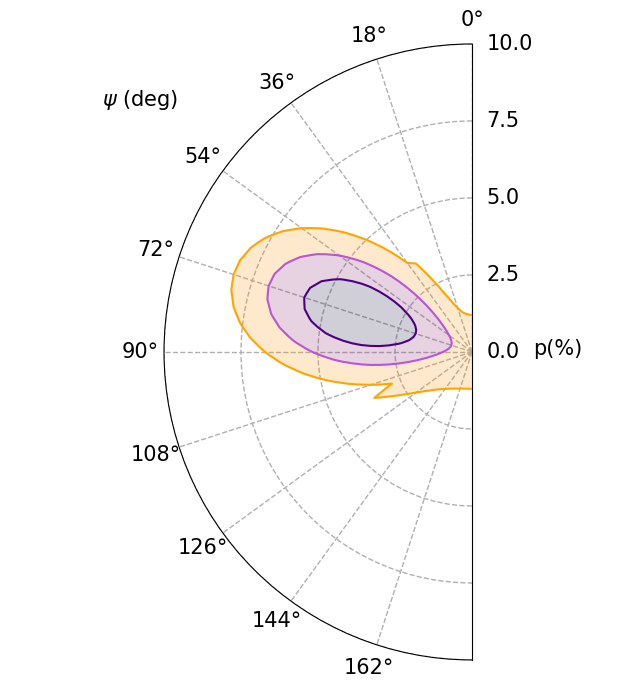

In [17]:
#PEX perpendicular



data = np.loadtxt('/home/c2032014/PhD/IC4329A/1st_pex_perp.qdp')
data1 = np.transpose(data)

p_min=0  #defining min and max polarisation  degree and angle: converting p to percentage
phi_min=np.radians(0)  #phi already in radians
p_max=15
phi_max=np.radians(180)

#p_min=2  #defining min and max polarisation  degree and angle: converting p to percentage
#phi_min=np.radians(-35)  #phi already in radians
#p_max=8
#phi_max=np.radians(15)
#phi_min=np.radians(-180)

best_cs=data.min()
level_1=best_cs+2.3
level_2=best_cs+6.18 #4.61
level_3=best_cs+11.83#9.21

#-- Plot... ------------------------------------------------
fig, ax = plt.subplots(subplot_kw=dict(projection='polar',theta_offset=np.radians(90)), figsize=(8,8))
ax.contourf(data, levels=[best_cs,level_1, level_2, level_3], cmap='inferno', extent=(phi_min, phi_max, p_min, p_max),alpha=0.2, zorder=5) #colours in the contours, f
ax.contour(data, levels=[level_1, level_2, level_3], colors=['indigo', 'mediumorchid', 'orange'], extent=(phi_min, phi_max, p_min,p_max), zorder=10) #outlines contours
ax.set_thetamin(0) #setting the minimum polarisation angle (named theta from polar coords)
ax.set_thetamax(180) #setting the maximum polarisation angle 
ax.tick_params(axis="both", labelsize=15, size=7.0, width=1.5,   which='major') #gives number value nice layout
ax.set_rmin(0) #min polarisation degree
ax.set_rmax(10) #max polarisation degree
ax.set_yticks(np.linspace(0,10,5)) # Changes how many rings you get
#ax.yaxis.set_major_formatter("[%.2f") #moves the r labels left and right??
ax.set_xticks(np.radians(np.linspace(0,180, 10, endpoint=False)))
ax.annotate('p(%)', fontsize=15, xy=(0.85,0.495), xycoords='axes fraction')
ax.annotate('$\psi$ (deg)', fontsize=15, xy=(0.15,0.9), xycoords='axes fraction')
#ax.annotate('p(%)', fontsize=15, xy=(0.8,0.35), xycoords='axes fraction')
#ax.annotate('$\psi$ (deg)', fontsize=15, xy=(0.5,0.95), xycoords='axes fraction')
ax.set_rlabel_position(0)
ax.grid(linewidth=1, linestyle='--') #produces gridlines on plot

plt.savefig('perp.png')
plt.show()

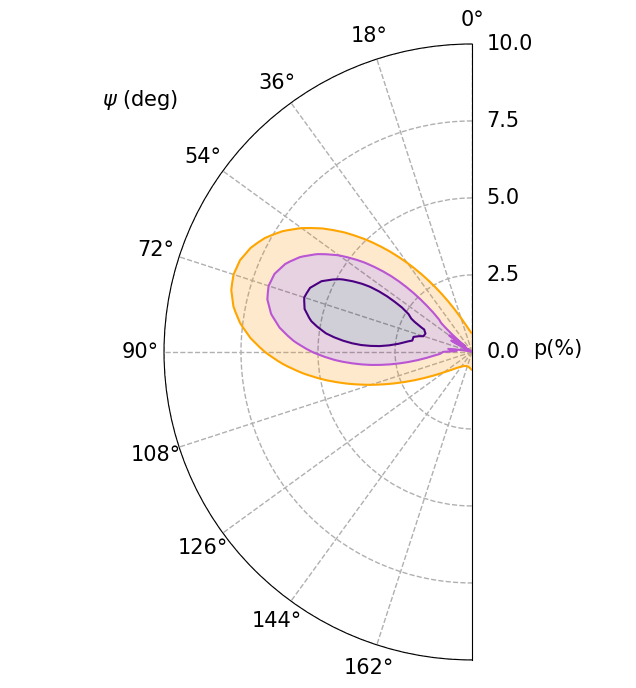

In [18]:
#PEX parallel



data = np.loadtxt('/home/c2032014/PhD/IC4329A/1st_pex_par.qdp')
data1 = np.transpose(data)

p_min=0  #defining min and max polarisation  degree and angle: converting p to percentage
phi_min=np.radians(0)  #phi already in radians
p_max=15
phi_max=np.radians(180)

#p_min=2  #defining min and max polarisation  degree and angle: converting p to percentage
#phi_min=np.radians(-35)  #phi already in radians
#p_max=8
#phi_max=np.radians(15)
#phi_min=np.radians(-180)

best_cs=data.min()
level_1=best_cs+2.3
level_2=best_cs+6.18 #4.61
level_3=best_cs+11.83#9.21

#-- Plot... ------------------------------------------------
fig, ax = plt.subplots(subplot_kw=dict(projection='polar',theta_offset=np.radians(90)), figsize=(8,8))
ax.contourf(data, levels=[best_cs,level_1, level_2, level_3], cmap='inferno', extent=(phi_min, phi_max, p_min, p_max),alpha=0.2, zorder=5) #colours in the contours, f
ax.contour(data, levels=[level_1, level_2, level_3], colors=['indigo', 'mediumorchid', 'orange'], extent=(phi_min, phi_max, p_min,p_max), zorder=10) #outlines contours
ax.set_thetamin(0) #setting the minimum polarisation angle (named theta from polar coords)
ax.set_thetamax(180) #setting the maximum polarisation angle 
ax.tick_params(axis="both", labelsize=15, size=7.0, width=1.5,   which='major') #gives number value nice layout
ax.set_rmin(0) #min polarisation degree
ax.set_rmax(10) #max polarisation degree
ax.set_yticks(np.linspace(0,10,5)) # Changes how many rings you get
#ax.yaxis.set_major_formatter("[%.2f") #moves the r labels left and right??
ax.set_xticks(np.radians(np.linspace(0,180, 10, endpoint=False)))
ax.annotate('p(%)', fontsize=15, xy=(0.85,0.495), xycoords='axes fraction')
ax.annotate('$\psi$ (deg)', fontsize=15, xy=(0.15,0.9), xycoords='axes fraction')
#ax.annotate('p(%)', fontsize=15, xy=(0.8,0.35), xycoords='axes fraction')
#ax.annotate('$\psi$ (deg)', fontsize=15, xy=(0.5,0.95), xycoords='axes fraction')
ax.set_rlabel_position(0)
ax.grid(linewidth=1, linestyle='--') #produces gridlines on plot

plt.savefig('par.png')
plt.show()

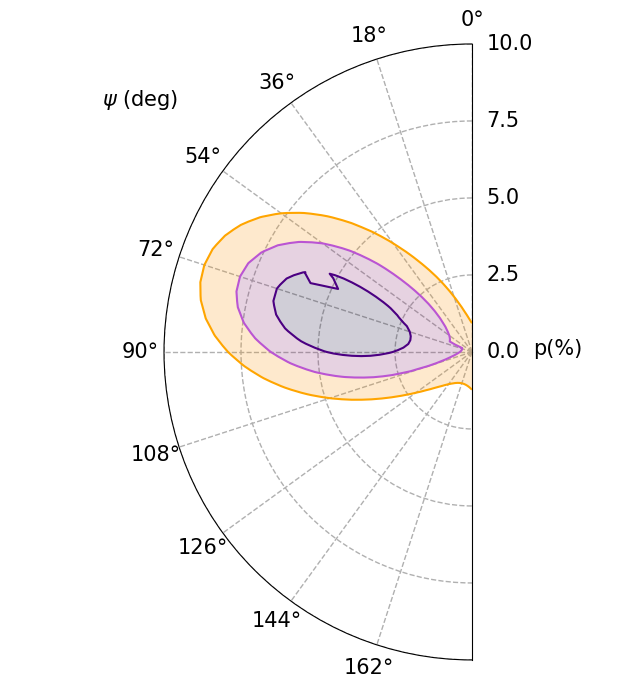

In [19]:
#PEX free



data = np.loadtxt('/home/c2032014/PhD/IC4329A/1st_free_89.qdp')
data1 = np.transpose(data)

p_min=0  #defining min and max polarisation  degree and angle: converting p to percentage
phi_min=np.radians(0)  #phi already in radians
p_max=15
phi_max=np.radians(180)

#p_min=2  #defining min and max polarisation  degree and angle: converting p to percentage
#phi_min=np.radians(-35)  #phi already in radians
#p_max=8
#phi_max=np.radians(15)
#phi_min=np.radians(-180)

best_cs=data.min()
level_1=best_cs+2.3
level_2=best_cs+6.18 #4.61
level_3=best_cs+11.83#9.21

#-- Plot... ------------------------------------------------
fig, ax = plt.subplots(subplot_kw=dict(projection='polar',theta_offset=np.radians(90)), figsize=(8,8))
ax.contourf(data, levels=[best_cs,level_1, level_2, level_3], cmap='inferno', extent=(phi_min, phi_max, p_min, p_max),alpha=0.2, zorder=5) #colours in the contours, f
ax.contour(data, levels=[level_1, level_2, level_3], colors=['indigo', 'mediumorchid', 'orange'], extent=(phi_min, phi_max, p_min,p_max), zorder=10) #outlines contours
ax.set_thetamin(0) #setting the minimum polarisation angle (named theta from polar coords)
ax.set_thetamax(180) #setting the maximum polarisation angle 
ax.tick_params(axis="both", labelsize=15, size=7.0, width=1.5,   which='major') #gives number value nice layout
ax.set_rmin(0) #min polarisation degree
ax.set_rmax(10) #max polarisation degree
ax.set_yticks(np.linspace(0,10,5)) # Changes how many rings you get
#ax.yaxis.set_major_formatter("[%.2f") #moves the r labels left and right??
ax.set_xticks(np.radians(np.linspace(0,180, 10, endpoint=False)))
ax.annotate('p(%)', fontsize=15, xy=(0.85,0.495), xycoords='axes fraction')
ax.annotate('$\psi$ (deg)', fontsize=15, xy=(0.15,0.9), xycoords='axes fraction')
#ax.annotate('p(%)', fontsize=15, xy=(0.8,0.35), xycoords='axes fraction')
#ax.annotate('$\psi$ (deg)', fontsize=15, xy=(0.5,0.95), xycoords='axes fraction')
ax.set_rlabel_position(0)
ax.grid(linewidth=1, linestyle='--') #produces gridlines on plot

plt.savefig('free.png')
plt.show()

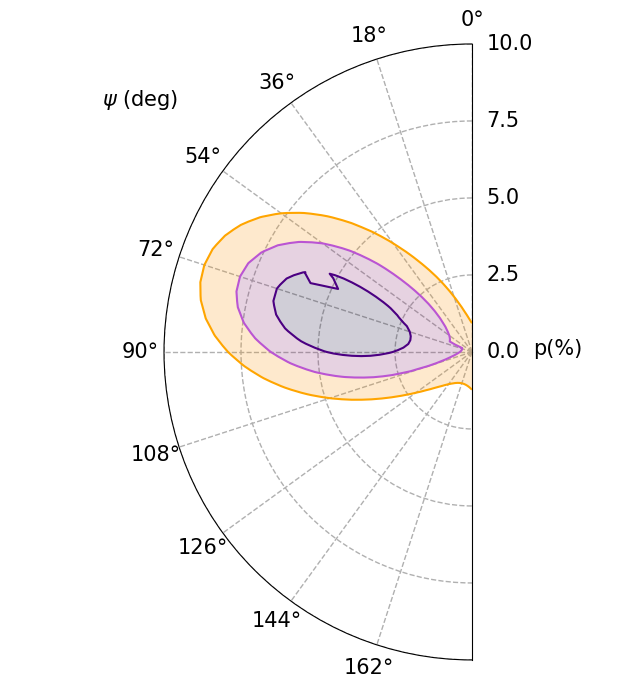

In [20]:
#PEX fixed to zero



data = np.loadtxt('/home/c2032014/PhD/IC4329A/1st_free_89.qdp')
data1 = np.transpose(data)

p_min=0  #defining min and max polarisation  degree and angle: converting p to percentage
phi_min=np.radians(0)  #phi already in radians
p_max=15
phi_max=np.radians(180)

#p_min=2  #defining min and max polarisation  degree and angle: converting p to percentage
#phi_min=np.radians(-35)  #phi already in radians
#p_max=8
#phi_max=np.radians(15)
#phi_min=np.radians(-180)

best_cs=data.min()
level_1=best_cs+2.3
level_2=best_cs+6.18 #4.61
level_3=best_cs+11.83#9.21

#-- Plot... ------------------------------------------------
fig, ax = plt.subplots(subplot_kw=dict(projection='polar',theta_offset=np.radians(90)), figsize=(8,8))
ax.contourf(data, levels=[best_cs,level_1, level_2, level_3], cmap='inferno', extent=(phi_min, phi_max, p_min, p_max),alpha=0.2, zorder=5) #colours in the contours, f
ax.contour(data, levels=[level_1, level_2, level_3], colors=['indigo', 'mediumorchid', 'orange'], extent=(phi_min, phi_max, p_min,p_max), zorder=10) #outlines contours
ax.set_thetamin(0) #setting the minimum polarisation angle (named theta from polar coords)
ax.set_thetamax(180) #setting the maximum polarisation angle 
ax.tick_params(axis="both", labelsize=15, size=7.0, width=1.5,   which='major') #gives number value nice layout
ax.set_rmin(0) #min polarisation degree
ax.set_rmax(10) #max polarisation degree
ax.set_yticks(np.linspace(0,10,5)) # Changes how many rings you get
#ax.yaxis.set_major_formatter("[%.2f") #moves the r labels left and right??
ax.set_xticks(np.radians(np.linspace(0,180, 10, endpoint=False)))
ax.annotate('p(%)', fontsize=15, xy=(0.85,0.495), xycoords='axes fraction')
ax.annotate('$\psi$ (deg)', fontsize=15, xy=(0.15,0.9), xycoords='axes fraction')
#ax.annotate('p(%)', fontsize=15, xy=(0.8,0.35), xycoords='axes fraction')
#ax.annotate('$\psi$ (deg)', fontsize=15, xy=(0.5,0.95), xycoords='axes fraction')
ax.set_rlabel_position(0)
ax.grid(linewidth=1, linestyle='--') #produces gridlines on plot

plt.savefig('free.png')
plt.show()

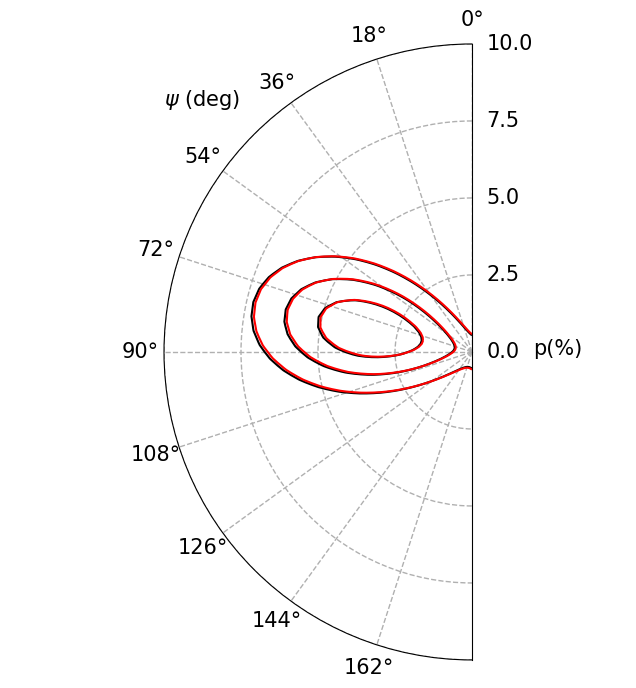

In [94]:
#WEIGHTED XSPEC STEPPAR (adams) and rej
data = np.loadtxt('/home/c2032014/PhD/shared_fits/weighted_xspec_steppar.qdp')
data1 = np.transpose(data)

p_min=0  #defining min and max polarisation  degree and angle: converting p to percentage
phi_min=np.radians(0)  #phi already in radians
p_max=10
phi_max=np.radians(180)

#p_min=2  #defining min and max polarisation  degree and angle: converting p to percentage
#phi_min=np.radians(-35)  #phi already in radians
#p_max=8
#phi_max=np.radians(15)
#phi_min=np.radians(-180)

best_cs=data.min()
level_1=best_cs+2.3
level_2=best_cs+6.18 #4.61
level_3=best_cs+11.83#9.21

#-- Plot... ------------------------------------------------
fig, ax = plt.subplots(subplot_kw=dict(projection='polar',theta_offset=np.radians(90)), figsize=(8,8))
#ax.contourf(data, levels=[best_cs,level_1, level_2, level_3], cmap='inferno', extent=(phi_min, phi_max, p_min, p_max),alpha=0.2, zorder=5) #colours in the contours, f
ax.contour(data, levels=[level_1, level_2, level_3], colors=['black', 'black', 'black'], extent=(phi_min, phi_max, p_min,p_max), zorder=10) #outlines contours
ax.set_thetamin(0) #setting the minimum polarisation angle (named theta from polar coords)
ax.set_thetamax(180) #setting the maximum polarisation angle 
ax.tick_params(axis="both", labelsize=15, size=7.0, width=1.5,   which='major') #gives number value nice layout
ax.set_rmin(0) #min polarisation degree
ax.set_rmax(10) #max polarisation degree
ax.set_yticks(np.linspace(0,10,5)) # Changes how many rings you get
#ax.yaxis.set_major_formatter("[%.2f") #moves the r labels left and right??
ax.set_xticks(np.radians(np.linspace(0,180, 10, endpoint=False)))
ax.annotate('p(%)', fontsize=15, xy=(0.85,0.495), xycoords='axes fraction')
ax.annotate('$\psi$ (deg)', fontsize=15, xy=(0.25,0.9), xycoords='axes fraction')
#ax.annotate('p(%)', fontsize=15, xy=(0.8,0.35), xycoords='axes fraction')
#ax.annotate('$\psi$ (deg)', fontsize=15, xy=(0.5,0.95), xycoords='axes fraction')
ax.set_rlabel_position(0)
ax.grid(linewidth=1, linestyle='--') #produces gridlines on plot

plt.savefig('unweighted.png')




#p_min=2  #defining min and max polarisation  degree and angle: converting p to percentage
#phi_min=np.radians(-35)  #phi already in radians
#p_max=8
#phi_max=np.radians(15)
#phi_min=np.radians(-180)


#-- Plot... ------------------------------------------------
#fig, ax = plt.subplots(subplot_kw=dict(projection='polar',theta_offset=np.radians(90)), figsize=(8,8))
#ax.contourf(data, levels=[best_cs,level_1, level_2, level_3], cmap='inferno', extent=(phi_min, phi_max, p_min, p_max),alpha=0.2, zorder=5) #colours in the contours, f
#ax.contour(datar, levels=[level_1, level_2, level_3], colors=['indigo', 'mediumorchid', 'orange'], extent=(phi_min, phi_max, p_min,p_max), zorder=10) #outlines contours
#ax.set_thetamin(0) #setting the minimum polarisation angle (named theta from polar coords)
#ax.set_thetamax(180) #setting the maximum polarisation angle 
#ax.tick_params(axis="both", labelsize=15, size=7.0, width=1.5,   which='major') #gives number value nice layout
#ax.set_rmin(0) #min polarisation degree
#ax.set_rmax(10) #max polarisation degree
#ax.set_yticks(np.linspace(0,10,5)) # Changes how many rings you get
#ax.yaxis.set_major_formatter("[%.2f") #moves the r labels left and right??
#ax.set_xticks(np.radians(np.linspace(0,180, 10, endpoint=False)))
#ax.annotate('p(%)', fontsize=15, xy=(0.85,0.495), xycoords='axes fraction')
#ax.annotate('$\psi$ (deg)', fontsize=15, xy=(0.15,0.9), xycoords='axes fraction')
#ax.annotate('p(%)', fontsize=15, xy=(0.8,0.35), xycoords='axes fraction')
#ax.annotate('$\psi$ (deg)', fontsize=15, xy=(0.5,0.95), xycoords='axes fraction')
#ax.set_rlabel_position(0)
#ax.grid(linewidth=1, linestyle='--') #produces gridlines on plot

plt.savefig('unweighted.png')

data = np.loadtxt('/home/c2032014/PhD/shared_fits/rej_xspec_steppar.qdp')
data1 = np.transpose(data)

p_min=0  #defining min and max polarisation  degree and angle: converting p to percentage
phi_min=np.radians(0)  #phi already in radians
p_max=10
phi_max=np.radians(180)

#p_min=2  #defining min and max polarisation  degree and angle: converting p to percentage
#phi_min=np.radians(-35)  #phi already in radians
#p_max=8
#phi_max=np.radians(15)
#phi_min=np.radians(-180)

best_cs=data.min()
level_1=best_cs+2.3
level_2=best_cs+6.18 #4.61
level_3=best_cs+11.83#9.21

#-- Plot... ------------------------------------------------
#fig, ax = plt.subplots(subplot_kw=dict(projection='polar',theta_offset=np.radians(90)), figsize=(8,8))
#ax.contourf(data, levels=[best_cs,level_1, level_2, level_3], cmap='inferno', extent=(phi_min, phi_max, p_min, p_max),alpha=0.2, zorder=5) #colours in the contours, f
ax.contour(data, levels=[level_1, level_2, level_3], colors=['red', 'red', 'red'], extent=(phi_min, phi_max, p_min,p_max), zorder=10) #outlines contours
#ax.set_thetamin(0) #setting the minimum polarisation angle (named theta from polar coords)
#ax.set_thetamax(180) #setting the maximum polarisation angle 
#ax.tick_params(axis="both", labelsize=15, size=7.0, width=1.5,   which='major') #gives number value nice layout
#ax.set_rmin(0) #min polarisation degree
#ax.set_rmax(10) #max polarisation degree
#ax.set_yticks(np.linspace(0,10,5)) # Changes how many rings you get
#ax.yaxis.set_major_formatter("[%.2f") #moves the r labels left and right??
#ax.set_xticks(np.radians(np.linspace(0,180, 10, endpoint=False)))
#ax.annotate('p(%)', fontsize=15, xy=(0.85,0.495), xycoords='axes fraction')
#ax.annotate('$\psi$ (deg)', fontsize=15, xy=(0.15,0.9), xycoords='axes fraction')
#ax.annotate('p(%)', fontsize=15, xy=(0.8,0.35), xycoords='axes fraction')
#ax.annotate('$\psi$ (deg)', fontsize=15, xy=(0.5,0.95), xycoords='axes fraction')
#ax.set_rlabel_position(0)
#ax.grid(linewidth=1, linestyle='--') #produces gridlines on plot

plt.savefig('weighted_xspec_and_rej.png')
#plt.show()
plt.show()

data = np.loadtxt('/home/c2032014/PhD/shared_fits/rej_xspec_steppar.qdp')
data1 = np.transpose(data)

p_min=0  #defining min and max polarisation  degree and angle: converting p to percentage
phi_min=np.radians(0)  #phi already in radians
p_max=10
phi_max=np.radians(180)

#p_min=2  #defining min and max polarisation  degree and angle: converting p to percentage
#phi_min=np.radians(-35)  #phi already in radians
#p_max=8
#phi_max=np.radians(15)
#phi_min=np.radians(-180)

best_cs=data.min()
level_1=best_cs+2.3
level_2=best_cs+6.18 #4.61
level_3=best_cs+11.83#9.21

#-- Plot... ------------------------------------------------
fig, ax = plt.subplots(subplot_kw=dict(projection='polar',theta_offset=np.radians(90)), figsize=(8,8))
#ax.contourf(data, levels=[best_cs,level_1, level_2, level_3], cmap='inferno', extent=(phi_min, phi_max, p_min, p_max),alpha=0.2, zorder=5) #colours in the contours, f
ax.contour(data, levels=[level_1, level_2, level_3], colors=['red','red','red'], extent=(phi_min, phi_max, p_min,p_max), zorder=10) #outlines contours
ax.set_thetamin(0) #setting the minimum polarisation angle (named theta from polar coords)
ax.set_thetamax(180) #setting the maximum polarisation angle 
ax.tick_params(axis="both", labelsize=15, size=7.0, width=1.5,   which='major') #gives number value nice layout
ax.set_rmin(0) #min polarisation degree
ax.set_rmax(10) #max polarisation degree
ax.set_yticks(np.linspace(0,10,5)) # Changes how many rings you get
#ax.yaxis.set_major_formatter("[%.2f") #moves the r labels left and right??
ax.set_xticks(np.radians(np.linspace(0,180, 10, endpoint=False)))
ax.annotate('p(%)', fontsize=15, xy=(0.85,0.495), xycoords='axes fraction')
ax.annotate('$\psi$ (deg)', fontsize=15, xy=(0.15,0.9), xycoords='axes fraction')
#ax.annotate('p(%)', fontsize=15, xy=(0.8,0.35), xycoords='axes fraction')
#ax.annotate('$\psi$ (deg)', fontsize=15, xy=(0.5,0.95), xycoords='axes fraction')
ax.set_rlabel_position(0)
ax.grid(linewidth=1, linestyle='--') #produces gridlines on plot

plt.savefig('unweighted.png')


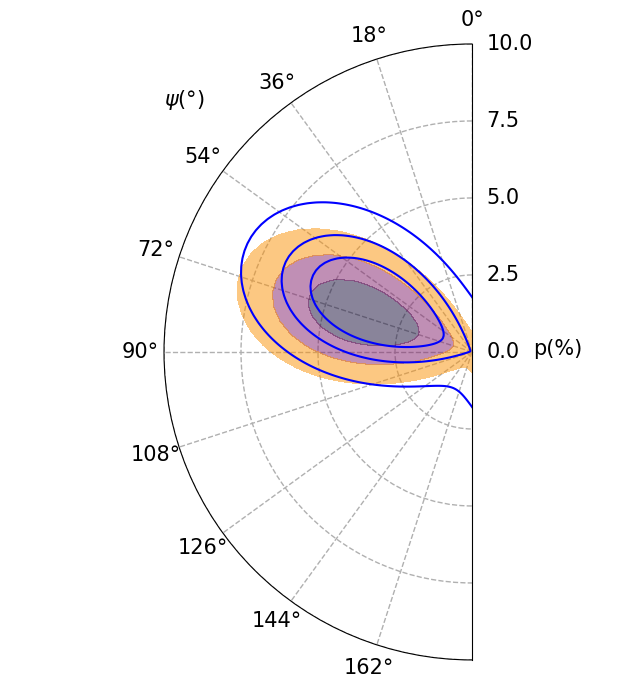

In [93]:
#WUNEIGHTED XSPEC STEPPAR vs PCUBE (adams)
data = np.loadtxt('/home/c2032014/PhD/shared_fits/unweighted_xspec_steppar.qdp')
data1 = np.transpose(data)

p_min=0  #defining min and max polarisation  degree and angle: converting p to percentage
phi_min=np.radians(0)  #phi already in radians
p_max=10
phi_max=np.radians(180)

#p_min=2  #defining min and max polarisation  degree and angle: converting p to percentage
#phi_min=np.radians(-35)  #phi already in radians
#p_max=8
#phi_max=np.radians(15)
#phi_min=np.radians(-180)

best_cs=data.min()
level_1=best_cs+2.3
level_2=best_cs+6.18 #4.61
level_3=best_cs+11.83#9.21

#-- Plot... ------------------------------------------------
fig, ax = plt.subplots(subplot_kw=dict(projection='polar',theta_offset=np.radians(90)), figsize=(8,8))
ax.contourf(data, levels=[best_cs,level_1, level_2, level_3], cmap='inferno', extent=(phi_min, phi_max, p_min, p_max),alpha=0.5, zorder=5) #colours in the contours, f
#ax.contour(data, levels=[level_1, level_2, level_3], colors=['orange','orange','orange'], extent=(phi_min, phi_max, p_min,p_max), zorder=10) #outlines contours
ax.set_thetamin(0) #setting the minimum polarisation angle (named theta from polar coords)
ax.set_thetamax(180) #setting the maximum polarisation angle 
ax.tick_params(axis="both", labelsize=15, size=7.0, width=1.5,   which='major') #gives number value nice layout
ax.set_rmin(0) #min polarisation degree
ax.set_rmax(10) #max polarisation degree
ax.set_yticks(np.linspace(0,10,5)) # Changes how many rings you get
#ax.yaxis.set_major_formatter("[%.2f") #moves the r labels left and right??
ax.set_xticks(np.radians(np.linspace(0,180, 10, endpoint=False)))
ax.annotate('p(%)', fontsize=15, xy=(0.85,0.495), xycoords='axes fraction')
ax.annotate('$\psi (\degree)$', fontsize=15, xy=(0.25,0.9), xycoords='axes fraction')
#ax.annotate('p(%)', fontsize=15, xy=(0.8,0.35), xycoords='axes fraction')
#ax.annotate('$\psi$ (deg)', fontsize=15, xy=(0.5,0.95), xycoords='axes fraction')
ax.set_rlabel_position(0)
ax.grid(linewidth=1, linestyle='--') #produces gridlines on plot

#plt.savefig('unweighted.png')




with fits.open('/home/c2032014/Downloads/ixpe01003601_pcube_bkgsub(1).fits') as hdu:
    data=hdu[1].data
    #hdu.info()
    q_0=float(data.field('QN'))
    u_0=float(data.field('UN'))
    Q_err=float(data.field('QN_ERR'))
    U_err=float(data.field('UN_ERR'))
    error=(Q_err+U_err)/2
   # print(q_0)
   # print(u_0)
   # print(error)

    p_mean = np.sqrt(q_0**2 + u_0**2)
    phi_min=np.radians(-180) 
    phi_min_ambiguity=np.radians(0)

    phi_max=np.radians(180)
    p_min=0.0 #starting polarisation degree
    p_max = (p_mean + (3.034854259 * error))*1




    p_grid=np.linspace(p_min,p_max,200)
    phi_grid=np.linspace(phi_min,phi_max,200)

    #Grid Maker for r
    counter=0
    r=[]
    r_all=[]

    #print(p_grid)
    while counter<len(phi_grid):
        for i in p_grid:
            q=i*np.cos(2*phi_grid[counter])  #calculaing q and u for ith phi in grid over all i in p 
            u=i*np.sin(2*phi_grid[counter])
            rval=np.sqrt((q_0-q)**2+(u_0-u)**2) #calculating 'distance' between q,u coords
            r.append(rval)  #attaching value to array and repeating through all pi
            #print(r)



        counter=counter+1   #when we have apended the final value for p_final,phi_i we append complete array to mega array, move onto next phi via the counter
        r_all.append(r)     # and reset the first array back to empty to fill up again with next round of phi_i calculated vals
        r=[]
            #print(counter)




    #print(n)       
    #print(r_all)

    r_all=np.array(r_all)
    n_all=r_all/error #Calculating n from grid of r

    n_all= np.array(n_all)
    n_all_t = np.transpose(n_all)  #grid requires transposing 
   # print(n_all)
    best_cs=0 #sigma values
    level_1=1.509592185
    level_2=2.145966026
    level_3=3.034854259

    #-- Plot... ------------------------------------------------ #z order just defines if something is plot on top of another thing 
    #fig, ax = plt.subplots(subplot_kw=dict(projection='polar', theta_offset=np.radians(90)), figsize=(8,8))
    #ax.contourf(n_all_t, levels=[best_cs,level_1, level_2, level_3], cmap='inferno', extent=(phi_min, phi_max, p_min*100, p_max*100),alpha=0.2, zorder=5) #colours in the contours, f
    ax.contour(n_all_t, levels=[level_1, level_2,level_3], colors=['blue','blue','blue'],extent=(phi_min, phi_max, p_min*100,p_max*100), zorder=5) #outlines contours
    #ax.set_thetamin(0) #setting the minimum polarisation angle (named theta from polar coords)
    #ax.set_thetamax(360) #setting the maximum polarisation angle 
    #ax.tick_params(axis="y", labelsize=15, width=5.5, which='major') #gives number value nice layout
    #ax.tick_params(axis="x", labelsize=15, width=5.5, which='major',pad=13)
    #ax.set_rmin(0) #min polarisation degree
    #ax.set_rmax(10) #max polarisation degree
    #ax.set_yticks(np.linspace(0,10,6)) # Changes how many rings you get
    #ax.yaxis.set_major_formatter("[%.2f") #moves the r labels left and right??
    #ax.set_xticks(np.radians(np.linspace(0,360, 16, endpoint=False)))
    #ax.annotate('p(%)', fontsize=15, xy=(0.41,0.755), xycoords='axes fraction')
    #ax.annotate('$\psi$ (deg)', fontsize=15, xy=(0.10,1.0), xycoords='axes fraction')
    #ax.set_yticklabels(["-50", "-60", "-70", "-80"], horizontalalignment = "left", verticalalignment = "top")
    #ax.set_rlabel_position(0) 
    #ax.grid(linewidth=1, linestyle='--') #produces gridlines on plot
    #plt.savefig('pcub.png')
    #print(len(n_all))
    #print(p_grid)
    #print(phi_grid)
plt.savefig('unweighted_xspec_and_pcube')      
plt.show()

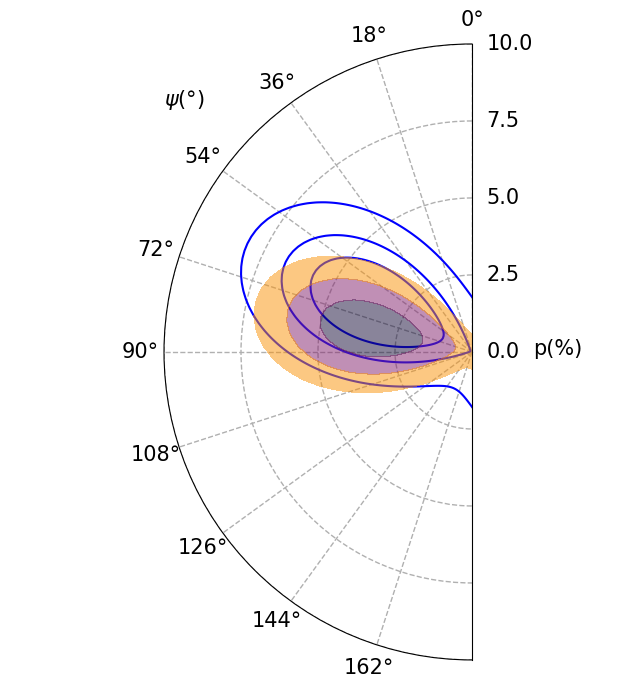

In [92]:
#unweighted pcube and weighted rej xspec

#pcube
with fits.open('/home/c2032014/Downloads/ixpe01003601_pcube_bkgsub(1).fits') as hdu:
    data=hdu[1].data
    #hdu.info()
    q_0=float(data.field('QN'))
    u_0=float(data.field('UN'))
    Q_err=float(data.field('QN_ERR'))
    U_err=float(data.field('UN_ERR'))
    error=(Q_err+U_err)/2
   # print(q_0)
   # print(u_0)
   # print(error)

    p_mean = np.sqrt(q_0**2 + u_0**2)
    phi_min=np.radians(-180) 
    phi_min_ambiguity=np.radians(0)

    phi_max=np.radians(180)
    p_min=0.0 #starting polarisation degree
    p_max = (p_mean + (3.034854259 * error))*1




    p_grid=np.linspace(p_min,p_max,200)
    phi_grid=np.linspace(phi_min,phi_max,200)

    #Grid Maker for r
    counter=0
    r=[]
    r_all=[]

    #print(p_grid)
    while counter<len(phi_grid):
        for i in p_grid:
            q=i*np.cos(2*phi_grid[counter])  #calculaing q and u for ith phi in grid over all i in p 
            u=i*np.sin(2*phi_grid[counter])
            rval=np.sqrt((q_0-q)**2+(u_0-u)**2) #calculating 'distance' between q,u coords
            r.append(rval)  #attaching value to array and repeating through all pi
            #print(r)



        counter=counter+1   #when we have apended the final value for p_final,phi_i we append complete array to mega array, move onto next phi via the counter
        r_all.append(r)     # and reset the first array back to empty to fill up again with next round of phi_i calculated vals
        r=[]
            #print(counter)




    #print(n)       
    #print(r_all)

    r_all=np.array(r_all)
    n_all=r_all/error #Calculating n from grid of r

    n_all= np.array(n_all)
    n_all_t = np.transpose(n_all)  #grid requires transposing 
   # print(n_all)
    best_cs=0 #sigma values
    level_1=1.509592185
    level_2=2.145966026
    level_3=3.034854259

    #-- Plot... ------------------------------------------------ #z order just defines if something is plot on top of another thing 
    fig, ax = plt.subplots(subplot_kw=dict(projection='polar', theta_offset=np.radians(90)), figsize=(8,8))
    #ax.contourf(n_all_t, levels=[best_cs,level_1, level_2, level_3], cmap='inferno', extent=(phi_min, phi_max, p_min*100, p_max*100),alpha=0.2, zorder=5) #colours in the contours, f
    ax.contour(n_all_t, levels=[level_1, level_2,level_3], colors=['blue','blue','blue'],extent=(phi_min, phi_max, p_min*100,p_max*100), zorder=5) #outlines contours
    #ax.set_thetamin(0) #setting the minimum polarisation angle (named theta from polar coords)
    #ax.set_thetamax(360) #setting the maximum polarisation angle 
    #ax.tick_params(axis="y", labelsize=15, width=5.5, which='major') #gives number value nice layout
    #ax.tick_params(axis="x", labelsize=15, width=5.5, which='major',pad=13)
    #ax.set_rmin(0) #min polarisation degree
    #ax.set_rmax(10) #max polarisation degree
    #ax.set_yticks(np.linspace(0,10,6)) # Changes how many rings you get
    #ax.yaxis.set_major_formatter("[%.2f") #moves the r labels left and right??
    #ax.set_xticks(np.radians(np.linspace(0,360, 16, endpoint=False)))
    #ax.annotate('p(%)', fontsize=15, xy=(0.41,0.755), xycoords='axes fraction')
    #ax.annotate('$\psi$ (deg)', fontsize=15, xy=(0.10,1.0), xycoords='axes fraction')
    #ax.set_yticklabels(["-50", "-60", "-70", "-80"], horizontalalignment = "left", verticalalignment = "top")
    #ax.set_rlabel_position(0) 
    #ax.grid(linewidth=1, linestyle='--') #produces gridlines on plot
    #plt.savefig('pcub.png')
    #print(len(n_all))
    #print(p_grid)
    #print(phi_grid)


#rej
data = np.loadtxt('/home/c2032014/PhD/shared_fits/rej_xspec_steppar.qdp')
data1 = np.transpose(data)

p_min=0  #defining min and max polarisation  degree and angle: converting p to percentage
phi_min=np.radians(0)  #phi already in radians
p_max=10
phi_max=np.radians(180)

#p_min=2  #defining min and max polarisation  degree and angle: converting p to percentage
#phi_min=np.radians(-35)  #phi already in radians
#p_max=8
#phi_max=np.radians(15)
#phi_min=np.radians(-180)

best_cs=data.min()
level_1=best_cs+2.3
level_2=best_cs+6.18 #4.61
level_3=best_cs+11.83#9.21

#-- Plot... ------------------------------------------------
#fig, ax = plt.subplots(subplot_kw=dict(projection='polar',theta_offset=np.radians(90)), figsize=(8,8))
ax.contourf(data, levels=[best_cs,level_1, level_2, level_3], cmap='inferno', extent=(phi_min, phi_max, p_min, p_max),alpha=0.5, zorder=5) #colours in the contours, f
#ax.contour(data, levels=[level_1, level_2, level_3], colors=['red','red','red'], extent=(phi_min, phi_max, p_min,p_max), zorder=10) #outlines contours
ax.set_thetamin(0) #setting the minimum polarisation angle (named theta from polar coords)
ax.set_thetamax(180) #setting the maximum polarisation angle 
ax.tick_params(axis="both", labelsize=15, size=7.0, width=1.5,   which='major') #gives number value nice layout
ax.set_rmin(0) #min polarisation degree
ax.set_rmax(10) #max polarisation degree
ax.set_yticks(np.linspace(0,10,5)) # Changes how many rings you get
#ax.yaxis.set_major_formatter("[%.2f") #moves the r labels left and right??
ax.set_xticks(np.radians(np.linspace(0,180, 10, endpoint=False)))
ax.annotate('p(%)', fontsize=15, xy=(0.85,0.495), xycoords='axes fraction')
ax.annotate('$\psi (\degree)$', fontsize=15, xy=(0.25,0.9), xycoords='axes fraction')
#ax.annotate('p(%)', fontsize=15, xy=(0.8,0.35), xycoords='axes fraction')
#ax.annotate('$\psi$ (deg)', fontsize=15, xy=(0.5,0.95), xycoords='axes fraction')
ax.set_rlabel_position(0)
ax.grid(linewidth=1, linestyle='--') #produces gridlines on plot
plt.savefig('pcube_and_rej.png')
plt.show()

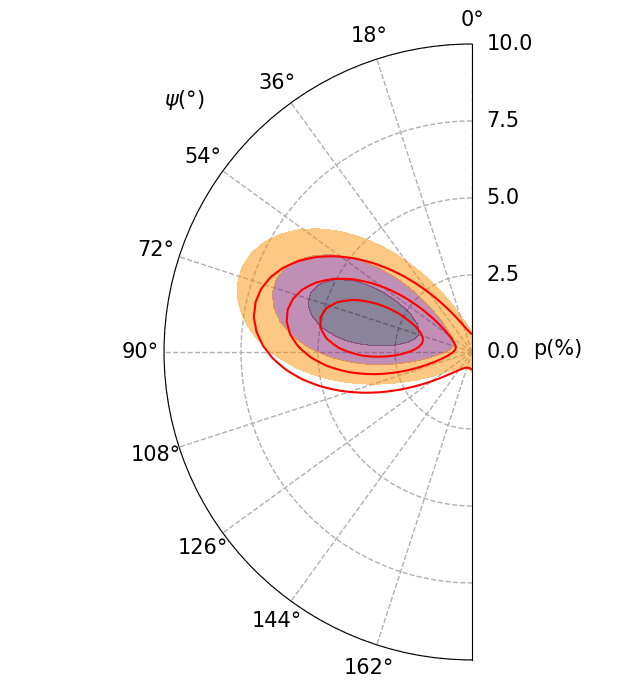

In [91]:


data = np.loadtxt('/home/c2032014/PhD/shared_fits/unweighted_xspec_steppar.qdp')
data1 = np.transpose(data)

p_min=0  #defining min and max polarisation  degree and angle: converting p to percentage
phi_min=np.radians(0)  #phi already in radians
p_max=10
phi_max=np.radians(180)

#p_min=2  #defining min and max polarisation  degree and angle: converting p to percentage
#phi_min=np.radians(-35)  #phi already in radians
#p_max=8
#phi_max=np.radians(15)
#phi_min=np.radians(-180)

best_cs=data.min()
level_1=best_cs+2.3
level_2=best_cs+6.18 #4.61
level_3=best_cs+11.83#9.21

#-- Plot... ------------------------------------------------
fig, ax = plt.subplots(subplot_kw=dict(projection='polar',theta_offset=np.radians(90)), figsize=(8,8))
ax.contourf(data, levels=[best_cs,level_1, level_2, level_3], cmap='inferno', extent=(phi_min, phi_max, p_min, p_max),alpha=0.5, zorder=5) #colours in the contours, f
#ax.contour(data, levels=[level_1, level_2, level_3], colors=['orange','orange','orange'], extent=(phi_min, phi_max, p_min,p_max), zorder=10) #outlines contours
#ax.set_thetamin(0) #setting the minimum polarisation angle (named theta from polar coords)
#ax.set_thetamax(180) #setting the maximum polarisation angle 
#ax.tick_params(axis="both", labelsize=15, size=7.0, width=1.5,   which='major') #gives number value nice layout
#ax.set_rmin(0) #min polarisation degree
#ax.set_rmax(10) #max polarisation degree
#ax.set_yticks(np.linspace(0,10,5)) # Changes how many rings you get
#ax.yaxis.set_major_formatter("[%.2f") #moves the r labels left and right??
#ax.set_xticks(np.radians(np.linspace(0,180, 10, endpoint=False)))
#ax.annotate('p(%)', fontsize=15, xy=(0.85,0.495), xycoords='axes fraction')
#ax.annotate('$\psi$ (deg)', fontsize=15, xy=(0.15,0.9), xycoords='axes fraction')
#ax.annotate('p(%)', fontsize=15, xy=(0.8,0.35), xycoords='axes fraction')
#ax.annotate('$\psi$ (deg)', fontsize=15, xy=(0.5,0.95), xycoords='axes fraction')
ax.set_rlabel_position(0)
ax.grid(linewidth=1, linestyle='--') #produces gridlines on plot


data = np.loadtxt('/home/c2032014/PhD/shared_fits/rej_xspec_steppar.qdp')
data1 = np.transpose(data)

p_min=0  #defining min and max polarisation  degree and angle: converting p to percentage
phi_min=np.radians(0)  #phi already in radians
p_max=10
phi_max=np.radians(180)

#p_min=2  #defining min and max polarisation  degree and angle: converting p to percentage
#phi_min=np.radians(-35)  #phi already in radians
#p_max=8
#phi_max=np.radians(15)
#phi_min=np.radians(-180)

best_cs=data.min()
level_1=best_cs+2.3
level_2=best_cs+6.18 #4.61
level_3=best_cs+11.83#9.21

#-- Plot... ------------------------------------------------
#fig, ax = plt.subplots(subplot_kw=dict(projection='polar',theta_offset=np.radians(90)), figsize=(8,8))
#ax.contourf(data, levels=[best_cs,level_1, level_2, level_3], cmap='inferno', extent=(phi_min, phi_max, p_min, p_max),alpha=0.2, zorder=5) #colours in the contours, f
ax.contour(data, levels=[level_1, level_2, level_3], colors=['red','red','red'], extent=(phi_min, phi_max, p_min,p_max), zorder=10) #outlines contours
ax.set_thetamin(0) #setting the minimum polarisation angle (named theta from polar coords)
ax.set_thetamax(180) #setting the maximum polarisation angle 
ax.tick_params(axis="both", labelsize=15, size=7.0, width=1.5,   which='major') #gives number value nice layout
ax.set_rmin(0) #min polarisation degree
ax.set_rmax(10) #max polarisation degree
ax.set_yticks(np.linspace(0,10,5)) # Changes how many rings you get
#ax.yaxis.set_major_formatter("[%.2f") #moves the r labels left and right??
ax.set_xticks(np.radians(np.linspace(0,180, 10, endpoint=False)))
ax.annotate('p(%)', fontsize=15, xy=(0.85,0.495), xycoords='axes fraction')
ax.annotate('$\psi (\degree)$', fontsize=15, xy=(0.25,0.9), xycoords='axes fraction')
#ax.annotate('p(%)', fontsize=15, xy=(0.8,0.35), xycoords='axes fraction')
#ax.annotate('$\psi$ (deg)', fontsize=15, xy=(0.5,0.95), xycoords='axes fraction')
ax.set_rlabel_position(0)
ax.grid(linewidth=1, linestyle='--') #produces gridlines on plot
plt.savefig('unweighted_xspec_and_rej.png')
plt.show()


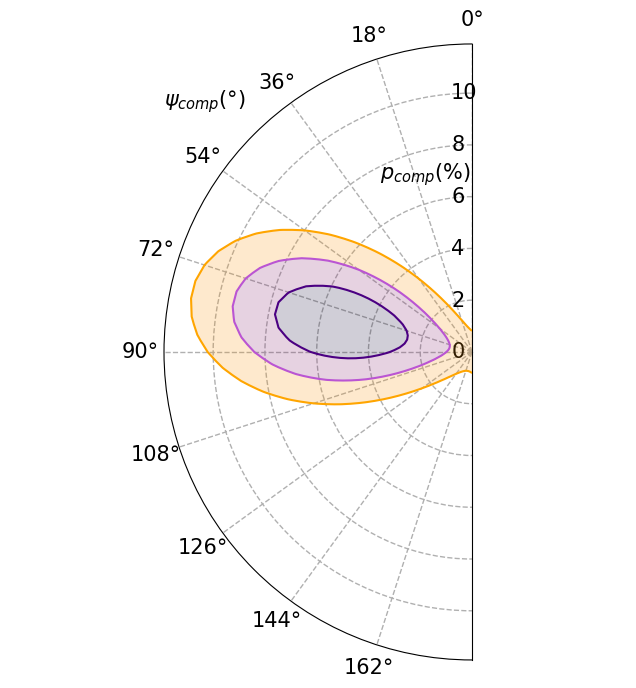

In [83]:
#relx



data = np.loadtxt('/home/c2032014/PhD/IC4329A/shared_fits/rej_0.qdp')
data1 = np.transpose(data)

p_min=0  #defining min and max polarisation  degree and angle: converting p to percentage
phi_min=np.radians(0)  #phi already in radians
p_max=15
phi_max=np.radians(180)

#p_min=2  #defining min and max polarisation  degree and angle: converting p to percentage
#phi_min=np.radians(-35)  #phi already in radians
#p_max=8
#phi_max=np.radians(15)
#phi_min=np.radians(-180)

best_cs=data.min()
level_1=best_cs+2.3
level_2=best_cs+6.18 #4.61
level_3=best_cs+11.83#9.21

#-- Plot... ------------------------------------------------
fig, ax = plt.subplots(subplot_kw=dict(projection='polar',theta_offset=np.radians(90)), figsize=(8,8))
ax.contourf(data, levels=[best_cs,level_1, level_2, level_3], cmap='inferno', extent=(phi_min, phi_max, p_min, p_max),alpha=0.2, zorder=5) #colours in the contours, f
ax.contour(data, levels=[level_1, level_2, level_3], colors=['indigo', 'mediumorchid', 'orange'], extent=(phi_min, phi_max, p_min,p_max), zorder=10) #outlines contours
ax.set_thetamin(0) #setting the minimum polarisation angle (named theta from polar coords)
ax.set_thetamax(180) #setting the maximum polarisation angle 
ax.tick_params(axis="both", labelsize=15, size=7.0, width=1.5,   which='major') #gives number value nice layout
ax.set_rmin(0) #min polarisation degree
ax.set_rmax(11.9) #max polarisation degree
#ax.set_rlabel_position(-5)
ax.tick_params(axis="y",direction="in", pad=-15)
#ax.tick_params(axis="x",direction="in", pad=-15)
#ax.set_yticks(np.linspace(0,10,5)) # Changes how many rings you get
#ax.yaxis.set_major_formatter("[%.2f") #moves the r labels left and right??
ax.set_xticks(np.radians(np.linspace(0,180, 10, endpoint=False)))
ax.annotate('$p_{comp} (\%)$', fontsize=15, xy=(0.6,0.78), xycoords='axes fraction')
ax.annotate('$\psi_{comp} (\degree)$', fontsize=15, xy=(0.25,0.9), xycoords='axes fraction')
#ax.annotate('p(%)', fontsize=15, xy=(0.8,0.35), xycoords='axes fraction')
#ax.annotate('$\psi$ (deg)', fontsize=15, xy=(0.5,0.95), xycoords='axes fraction')

ax.grid(linewidth=1, linestyle='--') #produces gridlines on plot

plt.savefig('relx_rej_0_13th.png')
plt.show()

The best fit polarisation degree and angle is 5.003457026937164 and 77.61016201882914 respectively
The min and max polarisation degree is 62.72337352347186 and 93.0853903789769 respectively
The min and max polarisation angle 2.5503059258979492 and 7.74980569948182 respectively


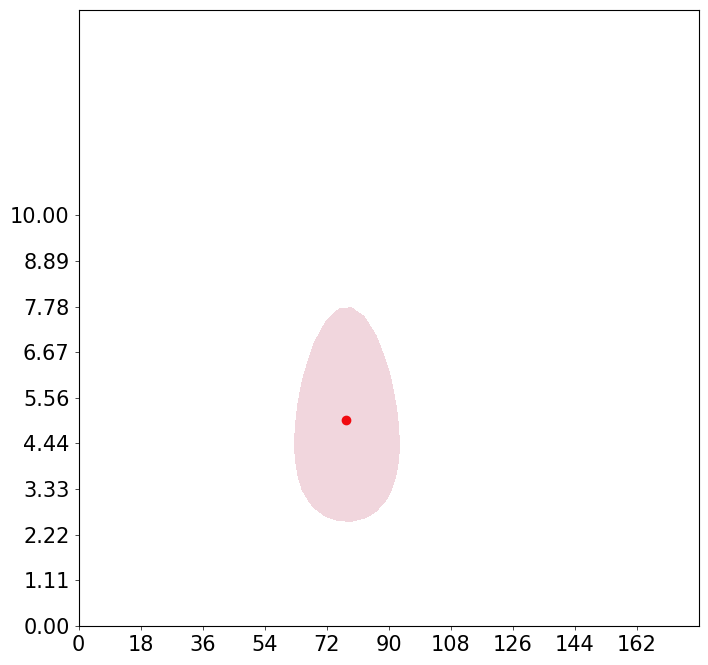

best fit pol degree and errors model 1 pref=0 5.003457026937164 plus 2.7463486725446566 minus 2.4531511010392144 with mean 2.5997498867919355
best fit pol angle and errors model 1 pref=0 77.61016201882914 plus 15.475228360147753 minus 14.886788495357287 with mean 15.18100842775252


<Figure size 640x480 with 0 Axes>

In [13]:
#relx
#same as above but now we want cartesian and delta chi squared=1

from statistics import mean

data = np.loadtxt('/home/c2032014/PhD/IC4329A/shared_fits/rej_0.qdp')
data1 = np.transpose(data)

p_min=0  #defining min and max polarisation  degree and angle: converting p to percentage
phi_min=np.degrees(np.radians(0))  #phi already in radians
p_max=15
phi_max=np.degrees(np.radians(180))

#p_min=2  #defining min and max polarisation  degree and angle: converting p to percentage
#phi_min=np.radians(-35)  #phi already in radians
#p_max=8
#phi_max=np.radians(15)
#phi_min=np.radians(-180)

best_cs=data.min()
level_1=best_cs+2.3
level_2=best_cs+6.18 #4.61
level_3=best_cs+11.83#9.21

#-- Plot... ------------------------------------------------
fig, ax = plt.subplots(figsize=(8,8))
contourf=ax.contourf(data, levels=[best_cs,level_1], cmap='inferno', extent=(phi_min, phi_max, p_min, p_max),alpha=0.2, zorder=5) #colours in the contours, f
#ax.contour(data, levels=[level_1], colors=['indigo', 'mediumorchid', 'orange'], extent=(phi_min, phi_max, p_min,p_max), zorder=10) #outlines contours
#ax.set_thetamin(0) #setting the minimum polarisation angle (named theta from polar coords)
#ax.set_thetamax(180) #setting the maximum polarisation angle 
ax.tick_params(axis="both", labelsize=15, size=3.0, width=0.5,   which='major') #gives number value nice layout
#ax.set_rmin(0) #min polarisation degree
#ax.set_rmax(11.9) #max polarisation degree
#ax.set_rlabel_position(-5)
#ax.tick_params(axis="y",direction="in", pad=-15)
#ax.tick_params(axis="x",direction="in", pad=-15)
ax.set_yticks(np.linspace(0,10,10)) # Changes how many rings you get
#ax.yaxis.set_major_formatter("[%.2f") #moves the r labels left and right??
ax.set_xticks((np.linspace(0,180,10, endpoint=False)))
#ax.annotate('$p_{comp} (\%)$', fontsize=15, xy=(0.6,0.78), xycoords='axes fraction')
#ax.annotate('$\psi_{comp} (\degree)$', fontsize=15, xy=(0.25,0.9), xycoords='axes fraction')
#ax.annotate('p(%)', fontsize=15, xy=(0.8,0.35), xycoords='axes fraction')
#ax.annotate('$\psi$ (deg)', fontsize=15, xy=(0.5,0.95), xycoords='axes fraction')

#ax.grid(linewidth=1, linestyle='--') #produces gridlines on plot



contour_path = contourf.collections[0].get_paths()[0]
vertices = contour_path.vertices

# Calculate the centroid of the contour
centroid_x = np.mean(vertices[:, 0])
centroid_y = np.mean(vertices[:, 1])

x_coords=vertices[:, 0]
y_coords=vertices[:, 1]

x_min = np.min(x_coords)
x_max = np.max(x_coords)
y_min = np.min(y_coords)
y_max = np.max(y_coords)


print('The best fit polarisation degree and angle is {} and {} respectively'.format(centroid_y,centroid_x))

print('The min and max polarisation degree is {} and {} respectively'.format(x_min,x_max))
print('The min and max polarisation angle {} and {} respectively'.format(y_min,y_max))
# Plot the centroid
ax.plot(centroid_x, centroid_y, 'ro')

# Display the plot
plt.show()

plus_y=y_max-centroid_y
minus_y=centroid_y-y_min

err_y=[plus_y,minus_y]

mean_pm_y=mean(err_y)

plus_x=x_max-centroid_x
minus_x=centroid_x-x_min
err_x=[plus_x,minus_x]
mean_pm_x=mean(err_x)

print ('best fit pol degree and errors model 1 pref=0 {} plus {} minus {} with mean {}'.format(centroid_y,plus_y,minus_y,mean_pm_y))
print ('best fit pol angle and errors model 1 pref=0 {} plus {} minus {} with mean {}'.format(centroid_x,plus_x,minus_x,mean_pm_x))



plt.savefig('relx_rej_0_1sig.png')
plt.show()

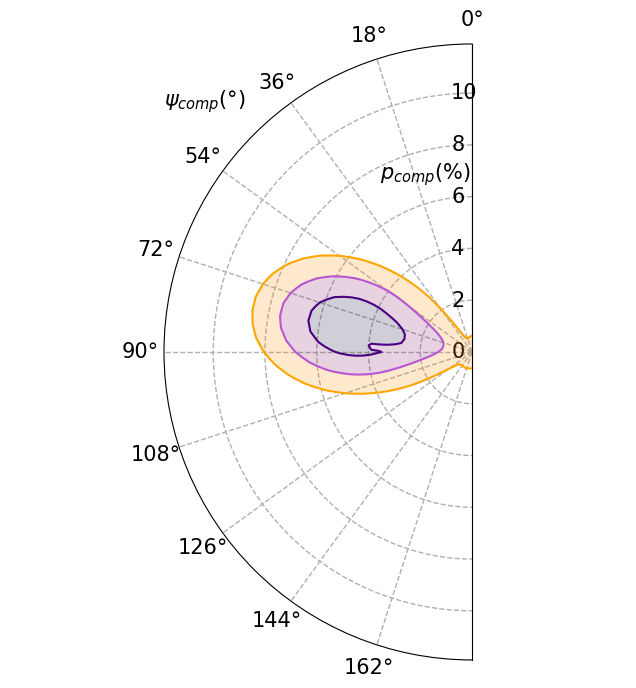

In [78]:
#rej pex perp



data = np.loadtxt('/home/c2032014/PhD/IC4329A/shared_fits/pex_rej_perp_13th3.qdp')
data1 = np.transpose(data)

p_min=0  #defining min and max polarisation  degree and angle: converting p to percentage
phi_min=np.radians(0)  #phi already in radians
p_max=15
phi_max=np.radians(180)

#p_min=2  #defining min and max polarisation  degree and angle: converting p to percentage
#phi_min=np.radians(-35)  #phi already in radians
#p_max=8
#phi_max=np.radians(15)
#phi_min=np.radians(-180)

best_cs=data.min()
level_1=best_cs+2.3
level_2=best_cs+6.18 #4.61
level_3=best_cs+11.83#9.21

#-- Plot... ------------------------------------------------
#-- Plot... ------------------------------------------------
fig, ax = plt.subplots(subplot_kw=dict(projection='polar',theta_offset=np.radians(90)), figsize=(8,8))
ax.contourf(data, levels=[best_cs,level_1, level_2, level_3], cmap='inferno', extent=(phi_min, phi_max, p_min, p_max),alpha=0.2, zorder=5) #colours in the contours, f
ax.contour(data, levels=[level_1, level_2, level_3], colors=['indigo', 'mediumorchid', 'orange'], extent=(phi_min, phi_max, p_min,p_max), zorder=10) #outlines contours
ax.set_thetamin(0) #setting the minimum polarisation angle (named theta from polar coords)
ax.set_thetamax(180) #setting the maximum polarisation angle 
ax.tick_params(axis="both", labelsize=15, size=7.0, width=1.5,   which='major') #gives number value nice layout
ax.set_rmin(0) #min polarisation degree
ax.set_rmax(11.9) #max polarisation degree
#ax.set_rlabel_position(-5)
ax.tick_params(axis="y",direction="in", pad=-15)
#ax.tick_params(axis="x",direction="in", pad=-15)
#ax.set_yticks(np.linspace(0,10,5)) # Changes how many rings you get
#ax.yaxis.set_major_formatter("[%.2f") #moves the r labels left and right??
ax.set_xticks(np.radians(np.linspace(0,180, 10, endpoint=False)))
ax.annotate('$p_{comp} (\%)$', fontsize=15, xy=(0.6,0.78), xycoords='axes fraction')
ax.annotate('$\psi_{comp} (\degree)$', fontsize=15, xy=(0.25,0.9), xycoords='axes fraction')
#ax.annotate('p(%)', fontsize=15, xy=(0.8,0.35), xycoords='axes fraction')
#ax.annotate('$\psi$ (deg)', fontsize=15, xy=(0.5,0.95), xycoords='axes fraction')

ax.grid(linewidth=1, linestyle='--') #produces gridlines on plot

plt.savefig('pex_rej_perp.png')
plt.show()

The best fit polarisation degree and angle is 4.408258080108577 and 78.45243489351286 respectively
The min and max polarisation degree is 64.31544854475187 and 91.92097842321333 respectively
The min and max polarisation angle 2.6602341990194365 and 6.43549886309688 respectively


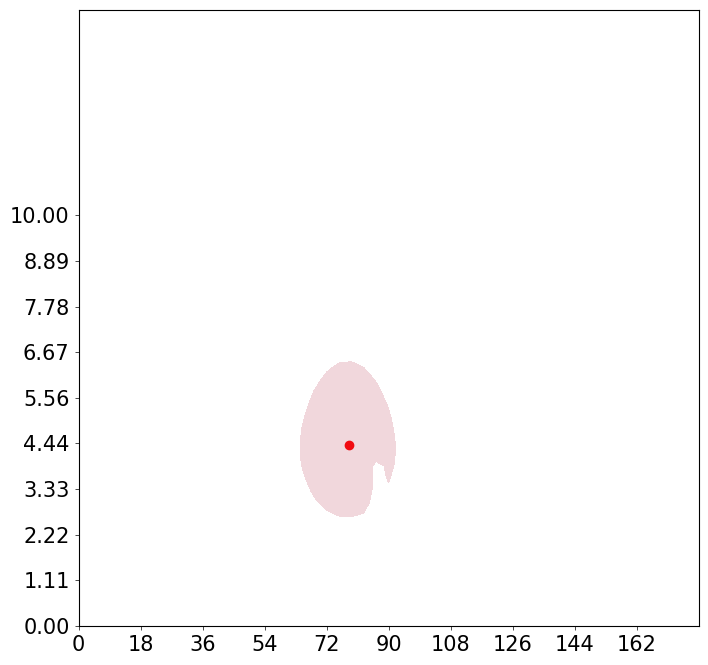

best fit pol degree and errors model 1 pref=0 4.408258080108577 plus 2.0272407829883035 minus 1.7480238810891402 with mean 1.8876323320387218
best fit pol angle and errors model 1 pref=0 78.45243489351286 plus 13.468543529700469 minus 14.136986348760985 with mean 13.802764939230727


<Figure size 640x480 with 0 Axes>

In [15]:

data = np.loadtxt('/home/c2032014/PhD/IC4329A/shared_fits/pex_rej_perp_13th3.qdp')
data1 = np.transpose(data)

p_min=0  #defining min and max polarisation  degree and angle: converting p to percentage
phi_min=np.degrees(np.radians(0))  #phi already in radians
p_max=15
phi_max=np.degrees(np.radians(180))

#p_min=2  #defining min and max polarisation  degree and angle: converting p to percentage
#phi_min=np.radians(-35)  #phi already in radians
#p_max=8
#phi_max=np.radians(15)
#phi_min=np.radians(-180)

best_cs=data.min()
level_1=best_cs+2.3
level_2=best_cs+6.18 #4.61
level_3=best_cs+11.83#9.21

#-- Plot... ------------------------------------------------
fig, ax = plt.subplots(figsize=(8,8))
contourf=ax.contourf(data, levels=[best_cs,level_1], cmap='inferno', extent=(phi_min, phi_max, p_min, p_max),alpha=0.2, zorder=5) #colours in the contours, f
#ax.contour(data, levels=[level_1], colors=['indigo', 'mediumorchid', 'orange'], extent=(phi_min, phi_max, p_min,p_max), zorder=10) #outlines contours
#ax.set_thetamin(0) #setting the minimum polarisation angle (named theta from polar coords)
#ax.set_thetamax(180) #setting the maximum polarisation angle 
ax.tick_params(axis="both", labelsize=15, size=3.0, width=0.5,   which='major') #gives number value nice layout
#ax.set_rmin(0) #min polarisation degree
#ax.set_rmax(11.9) #max polarisation degree
#ax.set_rlabel_position(-5)
#ax.tick_params(axis="y",direction="in", pad=-15)
#ax.tick_params(axis="x",direction="in", pad=-15)
ax.set_yticks(np.linspace(0,10,10)) # Changes how many rings you get
#ax.yaxis.set_major_formatter("[%.2f") #moves the r labels left and right??
ax.set_xticks((np.linspace(0,180,10, endpoint=False)))
#ax.annotate('$p_{comp} (\%)$', fontsize=15, xy=(0.6,0.78), xycoords='axes fraction')
#ax.annotate('$\psi_{comp} (\degree)$', fontsize=15, xy=(0.25,0.9), xycoords='axes fraction')
#ax.annotate('p(%)', fontsize=15, xy=(0.8,0.35), xycoords='axes fraction')
#ax.annotate('$\psi$ (deg)', fontsize=15, xy=(0.5,0.95), xycoords='axes fraction')

#ax.grid(linewidth=1, linestyle='--') #produces gridlines on plot



contour_path = contourf.collections[0].get_paths()[0]
vertices = contour_path.vertices

# Calculate the centroid of the contour
centroid_x = np.mean(vertices[:, 0])
centroid_y = np.mean(vertices[:, 1])

x_coords=vertices[:, 0]
y_coords=vertices[:, 1]

x_min = np.min(x_coords)
x_max = np.max(x_coords)
y_min = np.min(y_coords)
y_max = np.max(y_coords)


print('The best fit polarisation degree and angle is {} and {} respectively'.format(centroid_y,centroid_x))

print('The min and max polarisation degree is {} and {} respectively'.format(x_min,x_max))
print('The min and max polarisation angle {} and {} respectively'.format(y_min,y_max))
# Plot the centroid
ax.plot(centroid_x, centroid_y, 'ro')

# Display the plot
plt.show()


plus_y=y_max-centroid_y
minus_y=centroid_y-y_min

err_y=[plus_y,minus_y]

mean_pm_y=mean(err_y)

plus_x=x_max-centroid_x
minus_x=centroid_x-x_min
err_x=[plus_x,minus_x]
mean_pm_x=mean(err_x)

print ('best fit pol degree and errors model 1 pref=0 {} plus {} minus {} with mean {}'.format(centroid_y,plus_y,minus_y,mean_pm_y))
print ('best fit pol angle and errors model 1 pref=0 {} plus {} minus {} with mean {}'.format(centroid_x,plus_x,minus_x,mean_pm_x))



plt.savefig('pex_rej_perp_1sig.png')
plt.show()

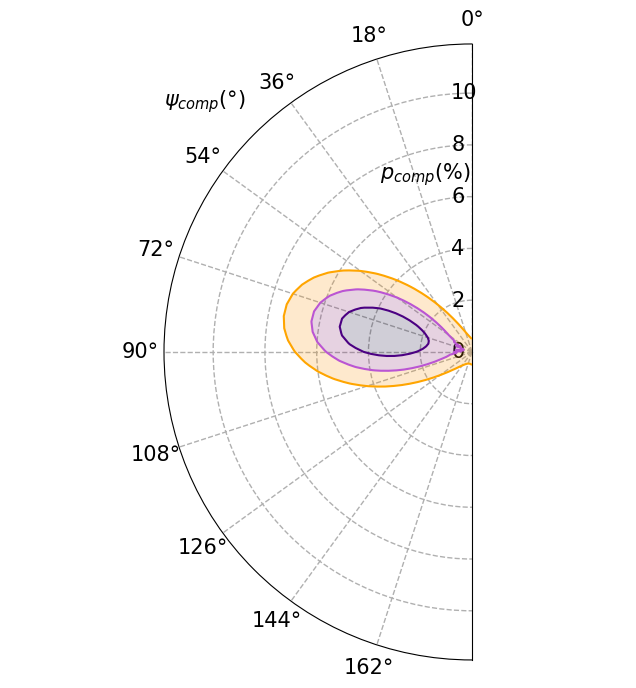

In [82]:
#rej pex par



data = np.loadtxt('/home/c2032014/PhD/IC4329A/shared_fits/pex_rej_par_13th1.qdp')
data1 = np.transpose(data)

p_min=0  #defining min and max polarisation  degree and angle: converting p to percentage
phi_min=np.radians(0)  #phi already in radians
p_max=15
phi_max=np.radians(180)

#p_min=2  #defining min and max polarisation  degree and angle: converting p to percentage
#phi_min=np.radians(-35)  #phi already in radians
#p_max=8
#phi_max=np.radians(15)
#phi_min=np.radians(-180)

best_cs=data.min()
level_1=best_cs+2.3
level_2=best_cs+6.18 #4.61
level_3=best_cs+11.83#9.21

#-- Plot... ------------------------------------------------
#-- Plot... ------------------------------------------------
fig, ax = plt.subplots(subplot_kw=dict(projection='polar',theta_offset=np.radians(90)), figsize=(8,8))
ax.contourf(data, levels=[best_cs,level_1, level_2, level_3], cmap='inferno', extent=(phi_min, phi_max, p_min, p_max),alpha=0.2, zorder=5) #colours in the contours, f
ax.contour(data, levels=[level_1, level_2, level_3], colors=['indigo', 'mediumorchid', 'orange'], extent=(phi_min, phi_max, p_min,p_max), zorder=10) #outlines contours
ax.set_thetamin(0) #setting the minimum polarisation angle (named theta from polar coords)
ax.set_thetamax(180) #setting the maximum polarisation angle 
ax.tick_params(axis="both", labelsize=15, size=7.0, width=1.5,   which='major') #gives number value nice layout
ax.set_rmin(0) #min polarisation degree
ax.set_rmax(11.9) #max polarisation degree
#ax.set_rlabel_position(-5)
ax.tick_params(axis="y",direction="in", pad=-15)
#ax.tick_params(axis="x",direction="in", pad=-15)
#ax.set_yticks(np.linspace(0,10,5)) # Changes how many rings you get
#ax.yaxis.set_major_formatter("[%.2f") #moves the r labels left and right??
ax.set_xticks(np.radians(np.linspace(0,180, 10, endpoint=False)))
ax.annotate('$p_{comp} (\%)$', fontsize=15, xy=(0.6,0.78), xycoords='axes fraction')
ax.annotate('$\psi_{comp} (\degree)$', fontsize=15, xy=(0.25,0.9), xycoords='axes fraction')
#ax.annotate('p(%)', fontsize=15, xy=(0.8,0.35), xycoords='axes fraction')
#ax.annotate('$\psi$ (deg)', fontsize=15, xy=(0.5,0.95), xycoords='axes fraction')

ax.grid(linewidth=1, linestyle='--') #produces gridlines on plot

plt.savefig('pex_rej_par.png')
plt.show()

The best fit polarisation degree and angle is 3.3623553360865017 and 77.54366082003149 respectively
The min and max polarisation degree is 62.86723293371443 and 92.94030401923769 respectively
The min and max polarisation angle 1.715629492708958 and 5.203031898610149 respectively


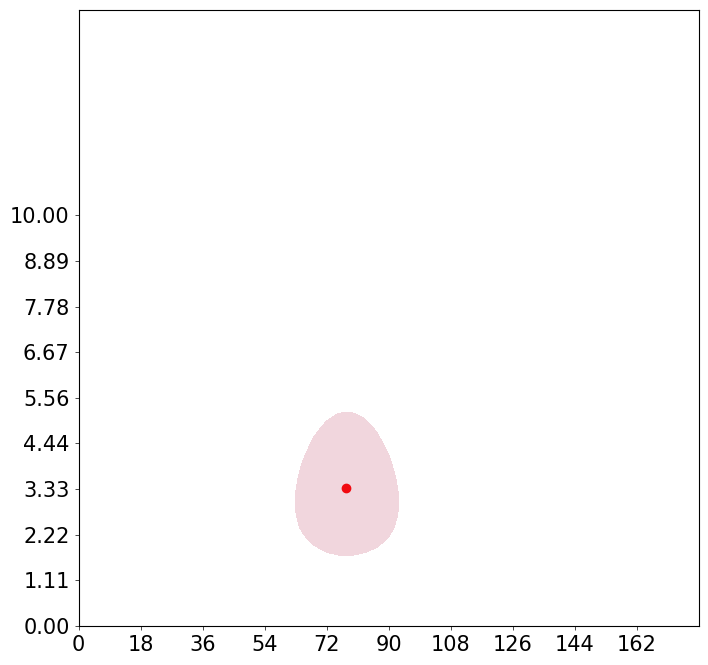

best fit pol degree and errors model 1 pref=0 3.3623553360865017 plus 1.8406765625236474 minus 1.6467258433775438 with mean 1.7437012029505956
best fit pol angle and errors model 1 pref=0 77.54366082003149 plus 15.396643199206196 minus 14.676427886317057 with mean 15.036535542761627


<Figure size 640x480 with 0 Axes>

In [16]:

data = np.loadtxt('/home/c2032014/PhD/IC4329A/shared_fits/pex_rej_par_13th1.qdp')
data1 = np.transpose(data)

p_min=0  #defining min and max polarisation  degree and angle: converting p to percentage
phi_min=np.degrees(np.radians(0))  #phi already in radians
p_max=15
phi_max=np.degrees(np.radians(180))

#p_min=2  #defining min and max polarisation  degree and angle: converting p to percentage
#phi_min=np.radians(-35)  #phi already in radians
#p_max=8
#phi_max=np.radians(15)
#phi_min=np.radians(-180)

best_cs=data.min()
level_1=best_cs+2.3
level_2=best_cs+6.18 #4.61
level_3=best_cs+11.83#9.21

#-- Plot... ------------------------------------------------
fig, ax = plt.subplots(figsize=(8,8))
contourf=ax.contourf(data, levels=[best_cs,level_1], cmap='inferno', extent=(phi_min, phi_max, p_min, p_max),alpha=0.2, zorder=5) #colours in the contours, f
#ax.contour(data, levels=[level_1], colors=['indigo', 'mediumorchid', 'orange'], extent=(phi_min, phi_max, p_min,p_max), zorder=10) #outlines contours
#ax.set_thetamin(0) #setting the minimum polarisation angle (named theta from polar coords)
#ax.set_thetamax(180) #setting the maximum polarisation angle 
ax.tick_params(axis="both", labelsize=15, size=3.0, width=0.5,   which='major') #gives number value nice layout
#ax.set_rmin(0) #min polarisation degree
#ax.set_rmax(11.9) #max polarisation degree
#ax.set_rlabel_position(-5)
#ax.tick_params(axis="y",direction="in", pad=-15)
#ax.tick_params(axis="x",direction="in", pad=-15)
ax.set_yticks(np.linspace(0,10,10)) # Changes how many rings you get
#ax.yaxis.set_major_formatter("[%.2f") #moves the r labels left and right??
ax.set_xticks((np.linspace(0,180,10, endpoint=False)))
#ax.annotate('$p_{comp} (\%)$', fontsize=15, xy=(0.6,0.78), xycoords='axes fraction')
#ax.annotate('$\psi_{comp} (\degree)$', fontsize=15, xy=(0.25,0.9), xycoords='axes fraction')
#ax.annotate('p(%)', fontsize=15, xy=(0.8,0.35), xycoords='axes fraction')
#ax.annotate('$\psi$ (deg)', fontsize=15, xy=(0.5,0.95), xycoords='axes fraction')

#ax.grid(linewidth=1, linestyle='--') #produces gridlines on plot



contour_path = contourf.collections[0].get_paths()[0]
vertices = contour_path.vertices

# Calculate the centroid of the contour
centroid_x = np.mean(vertices[:, 0])
centroid_y = np.mean(vertices[:, 1])

x_coords=vertices[:, 0]
y_coords=vertices[:, 1]

x_min = np.min(x_coords)
x_max = np.max(x_coords)
y_min = np.min(y_coords)
y_max = np.max(y_coords)


print('The best fit polarisation degree and angle is {} and {} respectively'.format(centroid_y,centroid_x))

print('The min and max polarisation degree is {} and {} respectively'.format(x_min,x_max))
print('The min and max polarisation angle {} and {} respectively'.format(y_min,y_max))
# Plot the centroid
ax.plot(centroid_x, centroid_y, 'ro')

# Display the plot
plt.show()

plus_y=y_max-centroid_y
minus_y=centroid_y-y_min

err_y=[plus_y,minus_y]

mean_pm_y=mean(err_y)

plus_x=x_max-centroid_x
minus_x=centroid_x-x_min
err_x=[plus_x,minus_x]
mean_pm_x=mean(err_x)

print ('best fit pol degree and errors model 1 pref=0 {} plus {} minus {} with mean {}'.format(centroid_y,plus_y,minus_y,mean_pm_y))
print ('best fit pol angle and errors model 1 pref=0 {} plus {} minus {} with mean {}'.format(centroid_x,plus_x,minus_x,mean_pm_x))




plt.savefig('relx_rej_par_1sig.png')
plt.show()

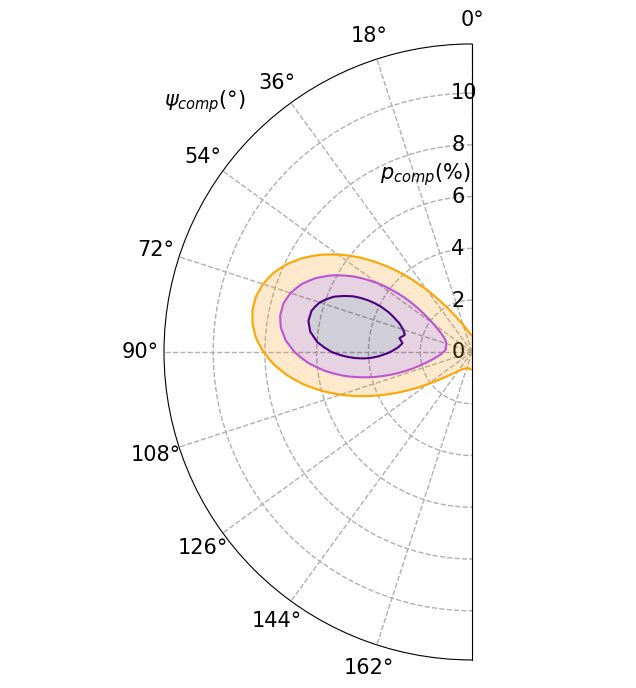

In [80]:
#rej pex free



data = np.loadtxt('/home/c2032014/PhD/IC4329A/shared_fits/pex_rej_free_13th2.qdp')
data1 = np.transpose(data)

p_min=0  #defining min and max polarisation  degree and angle: converting p to percentage
phi_min=np.radians(0)  #phi already in radians
p_max=15
phi_max=np.radians(180)

#p_min=2  #defining min and max polarisation  degree and angle: converting p to percentage
#phi_min=np.radians(-35)  #phi already in radians
#p_max=8
#phi_max=np.radians(15)
#phi_min=np.radians(-180)

best_cs=data.min()
level_1=best_cs+2.3
level_2=best_cs+6.18 #4.61
level_3=best_cs+11.83#9.21

#-- Plot... ------------------------------------------------
fig, ax = plt.subplots(subplot_kw=dict(projection='polar',theta_offset=np.radians(90)), figsize=(8,8))
ax.contourf(data, levels=[best_cs,level_1, level_2, level_3], cmap='inferno', extent=(phi_min, phi_max, p_min, p_max),alpha=0.2, zorder=5) #colours in the contours, f
ax.contour(data, levels=[level_1, level_2, level_3], colors=['indigo', 'mediumorchid', 'orange'], extent=(phi_min, phi_max, p_min,p_max), zorder=10) #outlines contours
ax.set_thetamin(0) #setting the minimum polarisation angle (named theta from polar coords)
ax.set_thetamax(180) #setting the maximum polarisation angle 
ax.tick_params(axis="both", labelsize=15, size=7.0, width=1.5,   which='major') #gives number value nice layout
ax.set_rmin(0) #min polarisation degree
ax.set_rmax(11.9) #max polarisation degree
#ax.set_rlabel_position(-5)
ax.tick_params(axis="y",direction="in", pad=-15)
#ax.tick_params(axis="x",direction="in", pad=-15)
#ax.set_yticks(np.linspace(0,10,5)) # Changes how many rings you get
#ax.yaxis.set_major_formatter("[%.2f") #moves the r labels left and right??
ax.set_xticks(np.radians(np.linspace(0,180, 10, endpoint=False)))
ax.annotate('$p_{comp} (\%)$', fontsize=15, xy=(0.6,0.78), xycoords='axes fraction')
ax.annotate('$\psi_{comp} (\degree)$', fontsize=15, xy=(0.25,0.9), xycoords='axes fraction')
#ax.annotate('p(%)', fontsize=15, xy=(0.8,0.35), xycoords='axes fraction')
#ax.annotate('$\psi$ (deg)', fontsize=15, xy=(0.5,0.95), xycoords='axes fraction')

ax.grid(linewidth=1, linestyle='--') #produces gridlines on plot

plt.savefig('pex_rej_free.png')
plt.show()

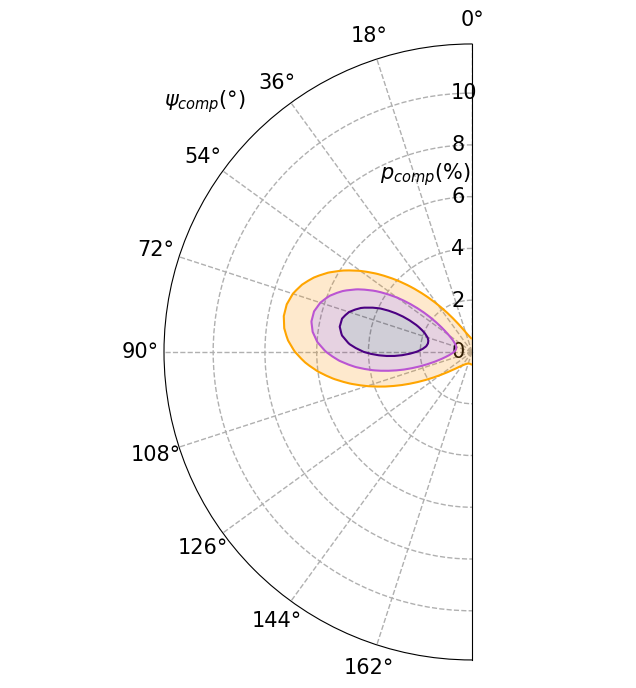

In [81]:
#rej pex 0



data = np.loadtxt('/home/c2032014/PhD/IC4329A/shared_fits/pex_rej_0_13th.qdp')
data1 = np.transpose(data)

p_min=0  #defining min and max polarisation  degree and angle: converting p to percentage
phi_min=np.radians(0)  #phi already in radians
p_max=15
phi_max=np.radians(180)

#p_min=2  #defining min and max polarisation  degree and angle: converting p to percentage
#phi_min=np.radians(-35)  #phi already in radians
#p_max=8
#phi_max=np.radians(15)
#phi_min=np.radians(-180)

best_cs=data.min()
level_1=best_cs+2.3
level_2=best_cs+6.18 #4.61
level_3=best_cs+11.83#9.21

#-- Plot... ------------------------------------------------
fig, ax = plt.subplots(subplot_kw=dict(projection='polar',theta_offset=np.radians(90)), figsize=(8,8))
ax.contourf(data, levels=[best_cs,level_1, level_2, level_3], cmap='inferno', extent=(phi_min, phi_max, p_min, p_max),alpha=0.2, zorder=5) #colours in the contours, f
ax.contour(data, levels=[level_1, level_2, level_3], colors=['indigo', 'mediumorchid', 'orange'], extent=(phi_min, phi_max, p_min,p_max), zorder=10) #outlines contours
ax.set_thetamin(0) #setting the minimum polarisation angle (named theta from polar coords)
ax.set_thetamax(180) #setting the maximum polarisation angle 
ax.tick_params(axis="both", labelsize=15, size=7.0, width=1.5,   which='major') #gives number value nice layout
ax.set_rmin(0) #min polarisation degree
ax.set_rmax(11.9) #max polarisation degree
#ax.set_rlabel_position(-5)
ax.tick_params(axis="y",direction="in", pad=-15)
#ax.tick_params(axis="x",direction="in", pad=-15)
#ax.set_yticks(np.linspace(0,10,5)) # Changes how many rings you get
#ax.yaxis.set_major_formatter("[%.2f") #moves the r labels left and right??
ax.set_xticks(np.radians(np.linspace(0,180, 10, endpoint=False)))
ax.annotate('$p_{comp} (\%)$', fontsize=15, xy=(0.6,0.78), xycoords='axes fraction')
ax.annotate('$\psi_{comp} (\degree)$', fontsize=15, xy=(0.25,0.9), xycoords='axes fraction')
#ax.annotate('p(%)', fontsize=15, xy=(0.8,0.35), xycoords='axes fraction')
#ax.annotate('$\psi$ (deg)', fontsize=15, xy=(0.5,0.95), xycoords='axes fraction')

ax.grid(linewidth=1, linestyle='--') #produces gridlines on plot

plt.savefig('pex_rej_0.png')
plt.show()

The best fit polarisation degree and angle is 3.362104001290939 and 77.63738518160875 respectively
The min and max polarisation degree is 62.864559846728085 and 92.94059788677961 respectively
The min and max polarisation angle 1.7344176851186062 and 5.203031898610149 respectively


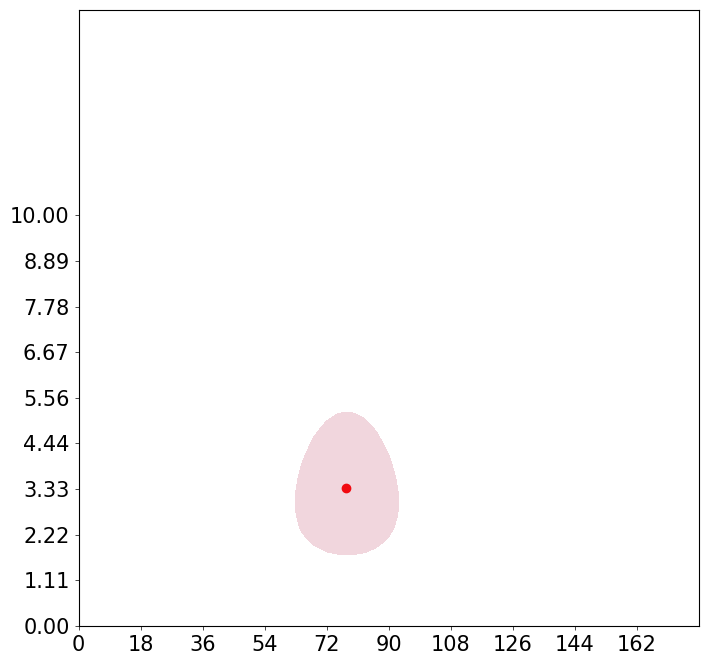

best fit pol degree and errors model 1 pref=0 3.362104001290939 plus 1.8409278973192102 minus 1.6276863161723327 with mean 1.7343071067457716
best fit pol angle and errors model 1 pref=0 77.63738518160875 plus 15.303212705170864 minus 14.772825334880665 with mean 15.038019020025764


<Figure size 640x480 with 0 Axes>

In [17]:

data = np.loadtxt('/home/c2032014/PhD/IC4329A/shared_fits/pex_rej_0_13th.qdp')
data1 = np.transpose(data)

p_min=0  #defining min and max polarisation  degree and angle: converting p to percentage
phi_min=np.degrees(np.radians(0))  #phi already in radians
p_max=15
phi_max=np.degrees(np.radians(180))

#p_min=2  #defining min and max polarisation  degree and angle: converting p to percentage
#phi_min=np.radians(-35)  #phi already in radians
#p_max=8
#phi_max=np.radians(15)
#phi_min=np.radians(-180)

best_cs=data.min()
level_1=best_cs+2.3
level_2=best_cs+6.18 #4.61
level_3=best_cs+11.83#9.21

#-- Plot... ------------------------------------------------
fig, ax = plt.subplots(figsize=(8,8))
contourf=ax.contourf(data, levels=[best_cs,level_1], cmap='inferno', extent=(phi_min, phi_max, p_min, p_max),alpha=0.2, zorder=5) #colours in the contours, f
#ax.contour(data, levels=[level_1], colors=['indigo', 'mediumorchid', 'orange'], extent=(phi_min, phi_max, p_min,p_max), zorder=10) #outlines contours
#ax.set_thetamin(0) #setting the minimum polarisation angle (named theta from polar coords)
#ax.set_thetamax(180) #setting the maximum polarisation angle 
ax.tick_params(axis="both", labelsize=15, size=3.0, width=0.5,   which='major') #gives number value nice layout
#ax.set_rmin(0) #min polarisation degree
#ax.set_rmax(11.9) #max polarisation degree
#ax.set_rlabel_position(-5)
#ax.tick_params(axis="y",direction="in", pad=-15)
#ax.tick_params(axis="x",direction="in", pad=-15)
ax.set_yticks(np.linspace(0,10,10)) # Changes how many rings you get
#ax.yaxis.set_major_formatter("[%.2f") #moves the r labels left and right??
ax.set_xticks((np.linspace(0,180,10, endpoint=False)))
#ax.annotate('$p_{comp} (\%)$', fontsize=15, xy=(0.6,0.78), xycoords='axes fraction')
#ax.annotate('$\psi_{comp} (\degree)$', fontsize=15, xy=(0.25,0.9), xycoords='axes fraction')
#ax.annotate('p(%)', fontsize=15, xy=(0.8,0.35), xycoords='axes fraction')
#ax.annotate('$\psi$ (deg)', fontsize=15, xy=(0.5,0.95), xycoords='axes fraction')

#ax.grid(linewidth=1, linestyle='--') #produces gridlines on plot



contour_path = contourf.collections[0].get_paths()[0]
vertices = contour_path.vertices

# Calculate the centroid of the contour
centroid_x = np.mean(vertices[:, 0])
centroid_y = np.mean(vertices[:, 1])

x_coords=vertices[:, 0]
y_coords=vertices[:, 1]

x_min = np.min(x_coords)
x_max = np.max(x_coords)
y_min = np.min(y_coords)
y_max = np.max(y_coords)


print('The best fit polarisation degree and angle is {} and {} respectively'.format(centroid_y,centroid_x))

print('The min and max polarisation degree is {} and {} respectively'.format(x_min,x_max))
print('The min and max polarisation angle {} and {} respectively'.format(y_min,y_max))
# Plot the centroid
ax.plot(centroid_x, centroid_y, 'ro')

# Display the plot
plt.show()


plus_y=y_max-centroid_y
minus_y=centroid_y-y_min

err_y=[plus_y,minus_y]

mean_pm_y=mean(err_y)

plus_x=x_max-centroid_x
minus_x=centroid_x-x_min
err_x=[plus_x,minus_x]
mean_pm_x=mean(err_x)

print ('best fit pol degree and errors model 1 pref=0 {} plus {} minus {} with mean {}'.format(centroid_y,plus_y,minus_y,mean_pm_y))
print ('best fit pol angle and errors model 1 pref=0 {} plus {} minus {} with mean {}'.format(centroid_x,plus_x,minus_x,mean_pm_x))






plt.savefig('pex_rej_0_1sig.png')
plt.show()